# TELECOM CHURN PREDICTION

### About the dataset (Telecom Churn Data)
1.Customer ID: Primary key of the record

2.Churn: Detecting which customers are likely to leave a service or to cancel a subscription to a service

3.Monthly Revenue: Revenue of each Customer

4.Monthly Minutes: Number of Minutes call spoken by Customer

5.Total Recurring Charge: The Charges for the Service

6.Director Assisted Calls: When we call an operator to request a telephone number

7.Overage Minutes: Count of Call used over duration to particular post-paid cell phone plan

8.Roaming Calls: The ability to get access to the Internet when away from home at the price of a local call or at a charge considerably less than the regular long-distance charges

9.PercChangeMinutes: It indicates Percentage Change in Minutes

10.PercChangeRevenues: Percentage change in Revenue

11.Three way Calls: A way of adding a third party to your conversation without the assistance of a telephone operator

12.Dropped Calls: Count of Phone calls gets disconnected somehow from the cellular network

13.Blocked Calls: Count of Telephone call that is unable to connect to an intended recipient

14.Unanswered Calls: Count of Calling that an individual perceives but is not currently pursuing

15.Received Calls: Number of calls received by the customer

16.Out bound Calls: Call initiated by the call centre agent to customer on behalf of client to know the target customer behaviour and needs

17.Inbound Calls: In inbound calls, call-centre or customer-care receives call from customer with issues and questions

18.Peak Calls In Out: Amount of time period with fewer calls than are handled in a busy period

19.CustomerCareCalls: Customer Care Calls Attempt Count

20.OffPeakCallsInOut: Amount of time period with more calls than are handled in a busy period

21.Call Forwarding Calls: Count of Calls Forwarded by user

22.Dropped Blocked Calls: Number of VM messages customer currently has on the server

23.Call Waiting Calls: Duration of call-in waiting period

24.Months In Service: Number of months customer using service

25.Unique Subs: subscription of different networks

26.Active Subs: subscriptions of the networks that are active or in usage

27.Handset Models: Count of Handsets are used to Contact one to one

28.CurrentEquipmentDays: Number of days Current Equipment is used

29.Age HH1: User aged below 45

30.Age HH2: User aged above 45

31.Children in HH: Whether there are Children in House hold

32.Handset Refurbished: Are the handsets refurbished or not

33.Handset Web Capable: Are the handsets capable of internet connectivity

34.Truck Owner: Is the user a Truck Owner

35.RV Owner: Is the user an RV owner

36.Home Ownership: Is the house the user is staying, his own

37.Buys Visa Mail Order: Does the user buy Visa Mail order

38.Responds to Mail Offers: Does the user respond to Mail offers

39.Opt-out Mailings: Did he opt out of the mail offers sent to him

40.Non-US-Travel: Does the user travel to other countries

41.Owns-Computer: Does he have a computer or not

42.Has-Credit Card: Does he have a credit card or not

43.Retention Calls: No of Retention Calls

44.Retention Offers Accepted: Customers accepting retaining the retaining offers given by the company

45.New Cell phone User: Number of customers buying new cell phone

46.NotNewCellphoneUser: Number of customers uses exisiting cell phone

47.Referrals Made By Subscriber: Referrals made by the existing customer to the other customer

48.Income Group: SThe column talks about the customer saying to which category the customer belongs to

49.Owns Motorcycle: The columns ask about the customer weather the customer owns a motorcycle or not

50.AdjustmentsToCreditRating: Adjustments made To CreditRating

51.Handset Price: Its amount paid by the customer for his cell phone

52.MadeCallToRetentionTeam: User call to Retention in same company

53.CreditRating: Credit card user rating (out of 7)

54.PrizmCode: Grouping of region according to users

55.Occupation: Occupation of User

56.MaritalStatus: Marital Status Indicated by Yes/No/Unknown

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 50
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1.DATA UNDERSTANDING AND PREPARATION

In [3]:
df1=pd.read_csv('cell2cell.csv')

In [4]:
df1.head(10)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,SEAPOR503,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,PITHOM412,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,MILMIL414,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,PITHOM412,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,OKCTUL918,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,No,38.050000,682.000000,52.000000,0.250000,0.000000,0.000000,148.000000,-3.100000,9.000000,1.700000,13.000000,0.700000,0.000000,42.200000,6.700000,0.000000,33.300000,53.000000,10.700000,0.000000,0.700000,53,1,1,OKCTUL918,3.000000,2.000000,231.000000,28.000000,0.000000,No,No,Yes,No,No,Known,No,No,No,Yes,No,Yes,0,0,Yes,No,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,No,31.660000,26.000000,30.000000,0.250000,0.000000,0.000000,60.000000,4.000000,0.000000,1.000000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,1.700000,1.000000,0.000000,0.000000,57,2,2,OKCTUL918,2.000000,2.000000,601.000000,52.000000,58.000000,No,No,Yes,No,No,Known,Yes,Yes,No,Yes,No,Yes,0,0,No,Yes,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,No,62.130000,98.000000,66.000000,2.480000,0.000000,0.000000,24.000000,6.800000,0.000000,0.300000,4.000000,4.000000,0.000000,0.000000,3.700000,0.000000,7.700000,7.300000,0.300000,0.000000,0.000000,59,2,2,OKCOKC405,3.000000,3.000000,464.000000,46.000000,46.000000,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,No,35.300000,24.000000,35.000000,0.000000,0.000000,0.000000,20.000000,-0.300000,0.000000,0.000000,1.000000,

In [5]:
df1['CustomerID'].nunique()

51047

In [6]:
# since customer id is unique for each customer we are dropping this column.

In [7]:
df1.drop(columns=['CustomerID'],inplace=True)

In [8]:
df1.shape

(51047, 57)

In [9]:
 for i in df1.columns:
    if df1[i].dtype == 'object':
        print('COLUMN NAME: ',i)
        print()
        print('NO OF UNIQUE CLASSES: ',df1[i].nunique())
        print()
        print(df1[i].describe())
        print()

COLUMN NAME:  Churn

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top          No
freq      36336
Name: Churn, dtype: object

COLUMN NAME:  ServiceArea

NO OF UNIQUE CLASSES:  747

count         51023
unique          747
top       NYCBRO917
freq           1684
Name: ServiceArea, dtype: object

COLUMN NAME:  ChildrenInHH

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top          No
freq      38679
Name: ChildrenInHH, dtype: object

COLUMN NAME:  HandsetRefurbished

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top          No
freq      43956
Name: HandsetRefurbished, dtype: object

COLUMN NAME:  HandsetWebCapable

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top         Yes
freq      46046
Name: HandsetWebCapable, dtype: object

COLUMN NAME:  TruckOwner

NO OF UNIQUE CLASSES:  2

count     51047
unique        2
top          No
freq      41524
Name: TruckOwner, dtype: object

COLUMN NAME:  RVOwner

NO OF UNIQUE CLASSES:  2

count     510

In [10]:
# as we can see newcellphoneuser and not newcellphone user is redundant column
df1=df1.drop(columns=['NotNewCellphoneUser'])

<AxesSubplot:>

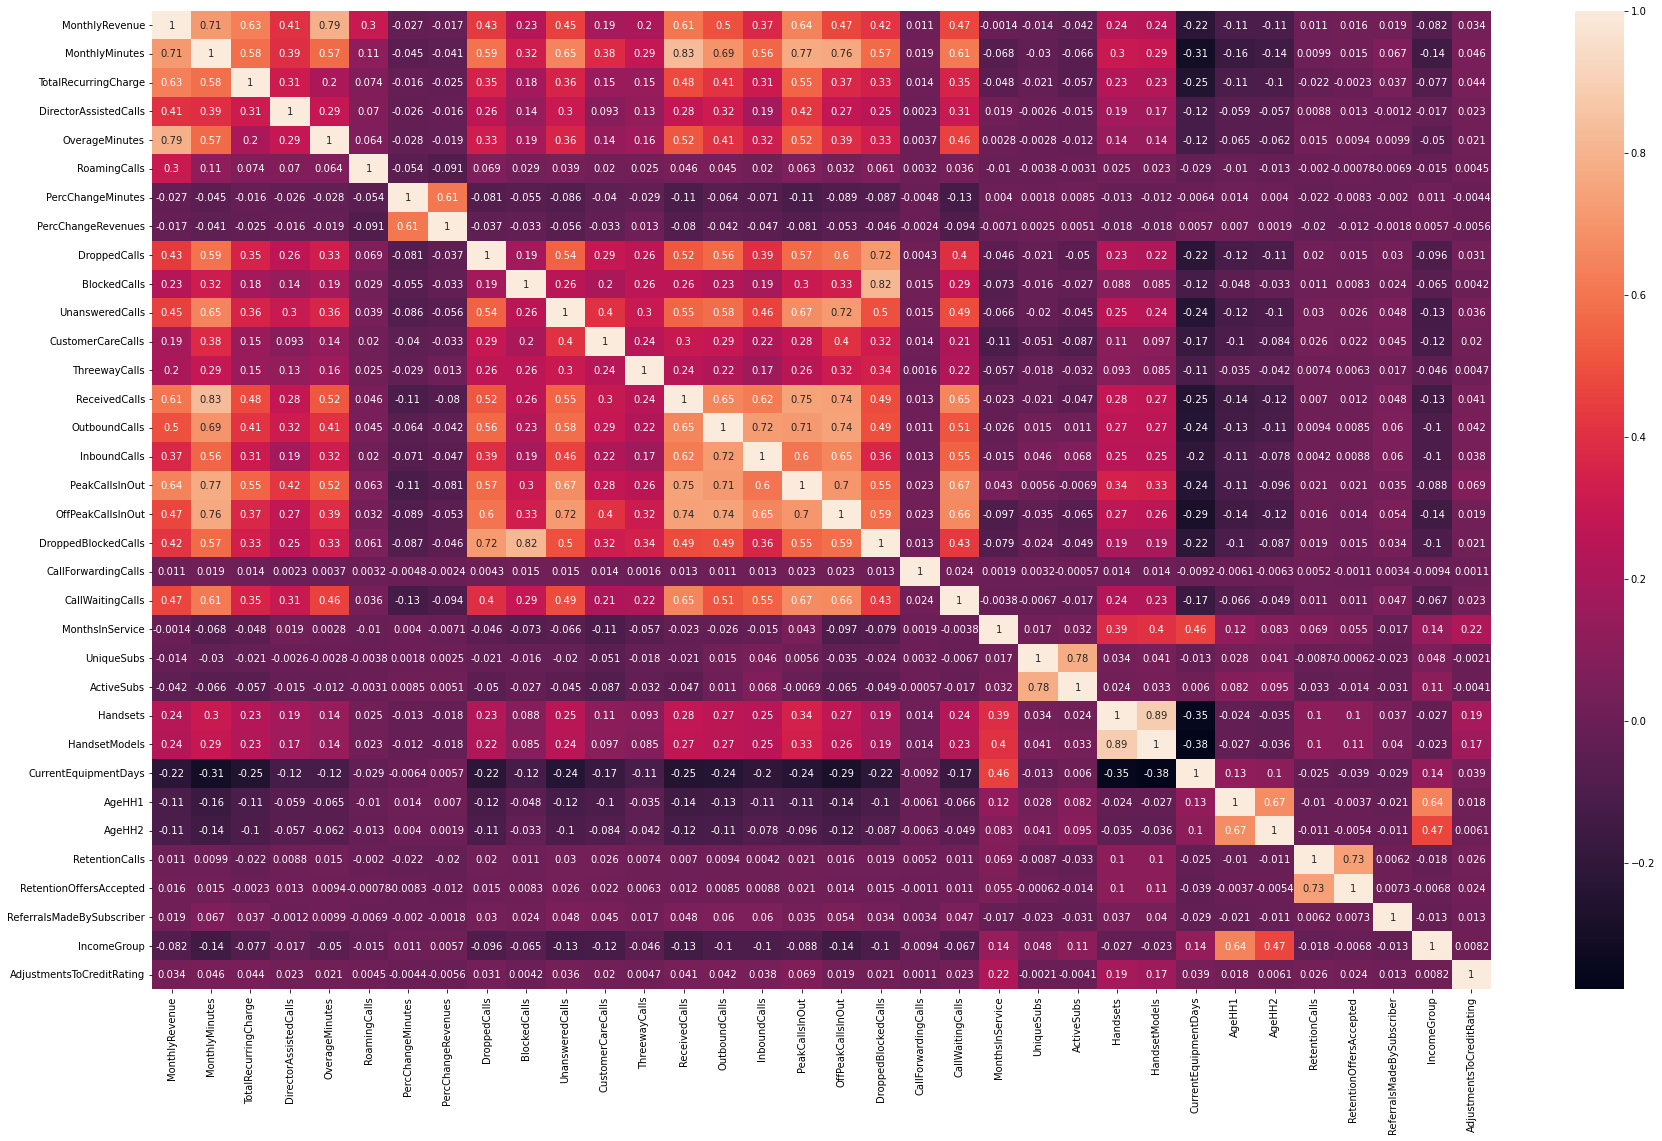

In [11]:
plt.rcParams['figure.figsize']=[30,18]
sns.heatmap(df1.corr(),annot=True)

from the above plot we come to know that "MonthlyMinutes" and "MonthlyRevenue" have high co relation 0.83. 

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='MonthlyMinutes'>

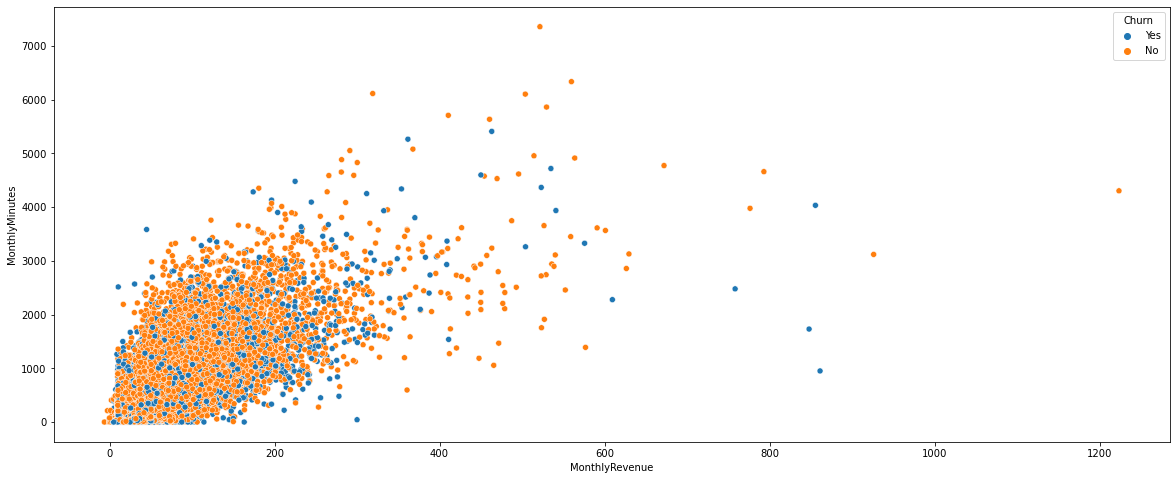

In [12]:
plt.rcParams['figure.figsize']=[20,8]
sns.scatterplot(x="MonthlyRevenue", y="MonthlyMinutes",hue='Churn', data=df1)

In the  scatter plot the points are more overlapping,it means non-linear model gives better results compare to linear model for this data.

### Treating the Handset and Handsetmodels variables

In [13]:
df1[['Handsets','HandsetModels']]

,Handsets,HandsetModels
0,2.000000,2.000000
1,2.000000,1.000000
2,1.000000,1.000000
3,9.000000,4.000000
4,4.000000,3.000000
...,...,...
51042,2.000000,2.000000
51043,2.000000,2.000000
51044,3.000000,2.000000
51045,2.000000,2.000000


In [14]:
df1['Handsets'].unique()

array([ 2.,  1.,  9.,  4.,  3., 10.,  5.,  8., 18.,  7.,  6., 24., 12.,
       11., 14., 13., 17., 16., 21., 19., 15., 22., 20., nan])

In [15]:
df1['HandsetModels'].unique()

array([ 2.,  1.,  4.,  3.,  5.,  6.,  9.,  7., 10.,  8., 11., 15., 14.,
       nan])

In [16]:
df1.dropna(subset=['HandsetModels'],inplace=True)

In [17]:
# perorming stastical test on these two variable.

In [18]:
from statsmodels.stats import weightstats as stests

In [19]:
x=df1['Handsets'][df1['Churn']=='Yes']
y=df1['Handsets'][df1['Churn']=='No']

In [20]:
t_stat, p_val = stats.ttest_ind(a =x, b =y)

# print the test statistic value and corresponding p-value
print('Test Statistic:', t_stat)
print('p-value:', p_val)

Test Statistic: -7.424760622989963
p-value: 1.147385066838404e-13


In [21]:
# we come to know that the means of two samples are different .

Perfroming t-test for handsetmodels column.

In [22]:
x=df1['HandsetModels'][df1['Churn']=='Yes']
y=df1['HandsetModels'][df1['Churn']=='No']

In [23]:
t_stat, p_val = stats.ttest_ind(a =x, b =y)

# print the test statistic value and corresponding p-value
print('Test Statistic:', t_stat)
print('p-value:', p_val)

Test Statistic: -9.055165161881412
p-value: 1.4103382551702694e-19


In [24]:
# since p-val is almost equal to zero hence two samples have different menas.

Conclusion:
* The statistical test shows both the columns are contributing to the target,hence we cannot drop any of them.    

### Treating service area categorical variable.

In [25]:
df1['ServiceArea']

0        SEAPOR503
1        PITHOM412
2        MILMIL414
3        PITHOM412
4        OKCTUL918
           ...    
51042    LAXSFN818
51043    LAXCDG310
51044    LAXCDG310
51045    NEVPOW619
51046    NEVPOW619
Name: ServiceArea, Length: 51046, dtype: object

In [26]:
df1['ServiceArea'].nunique()

747

In [27]:
# since we have 747 unique values in ServiceArea variable.
# check for the alternate variable which resembles the service region in dataset.

In [28]:
df1['PrizmCode'].unique()

array(['Suburban', 'Town', 'Other', 'Rural'], dtype=object)

In [29]:
# we have Prizmcode variable which is alternate to the service area, so we can drop the servicearea
#   considering it as redundant variable.

In [30]:
# dropping the redundant column serviceArea.
df1.drop(columns='ServiceArea',inplace=True)

### treating Handset price variable

In [31]:
df1['HandsetPrice'].unique()

array(['30', 'Unknown', '10', '80', '150', '300', '40', '200', '100',
       '130', '60', '400', '240', '250', '180', '500'], dtype=object)

In [32]:
df1[df1['HandsetPrice']=='Unknown'].shape[0]

28981

In [33]:
# replacing unknown with zeros
df1['HandsetPrice']=df1['HandsetPrice'].replace(to_replace='Unknown',value= 0)

In [34]:
df1['HandsetPrice']=df1['HandsetPrice'].replace(to_replace=0,value= np.nan)

In [35]:
# calculating null value percentage for Handsetprice variable
df1['HandsetPrice'].isnull().sum()/df1.shape[0]*100

56.7742820201387

In [36]:
# as we can see that we have more than 56% of null values , 
# hence we are dropping the column,instead of filling 56% values which are not true.

In [37]:
df1.drop(columns='HandsetPrice',inplace=True)

In [38]:
df1.shape

(51046, 54)

### Treating credit rating variable

In [39]:
df1['CreditRating'].unique()

array(['1-Highest', '4-Medium', '3-Good', '6-VeryLow', '2-High', '5-Low',
       '7-Lowest'], dtype=object)

In [40]:
# binning the variable with high,medium and low

In [41]:
dict_rating={ '1-Highest':'High',
       '2-High':'High',
       '3-Good':'Medium',
       '4-Medium':'Medium',
       '5-Low':'Low',
       '6-VeryLow':'Low',
       '7-Lowest':'Low'
        }

In [42]:
df1['CreditRating']=df1['CreditRating'].map(dict_rating)

In [43]:
df1['CreditRating'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [44]:
# now we have only 3 categories high , medium and low

In [45]:
### categorical variables

In [46]:
cat=df1.select_dtypes(include='object').columns

In [47]:
print(cat, 'number of categorical columns are' ,len(cat))


Index(['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
       'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'HasCreditCard', 'NewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object') number of categorical columns are 20


In [48]:
# numerical variables

In [49]:
nume=df1.select_dtypes(include=np.number).columns

In [50]:
print(nume,
      'number of numerical columns are' ,len(nume))

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object') number of numerical columns are 34


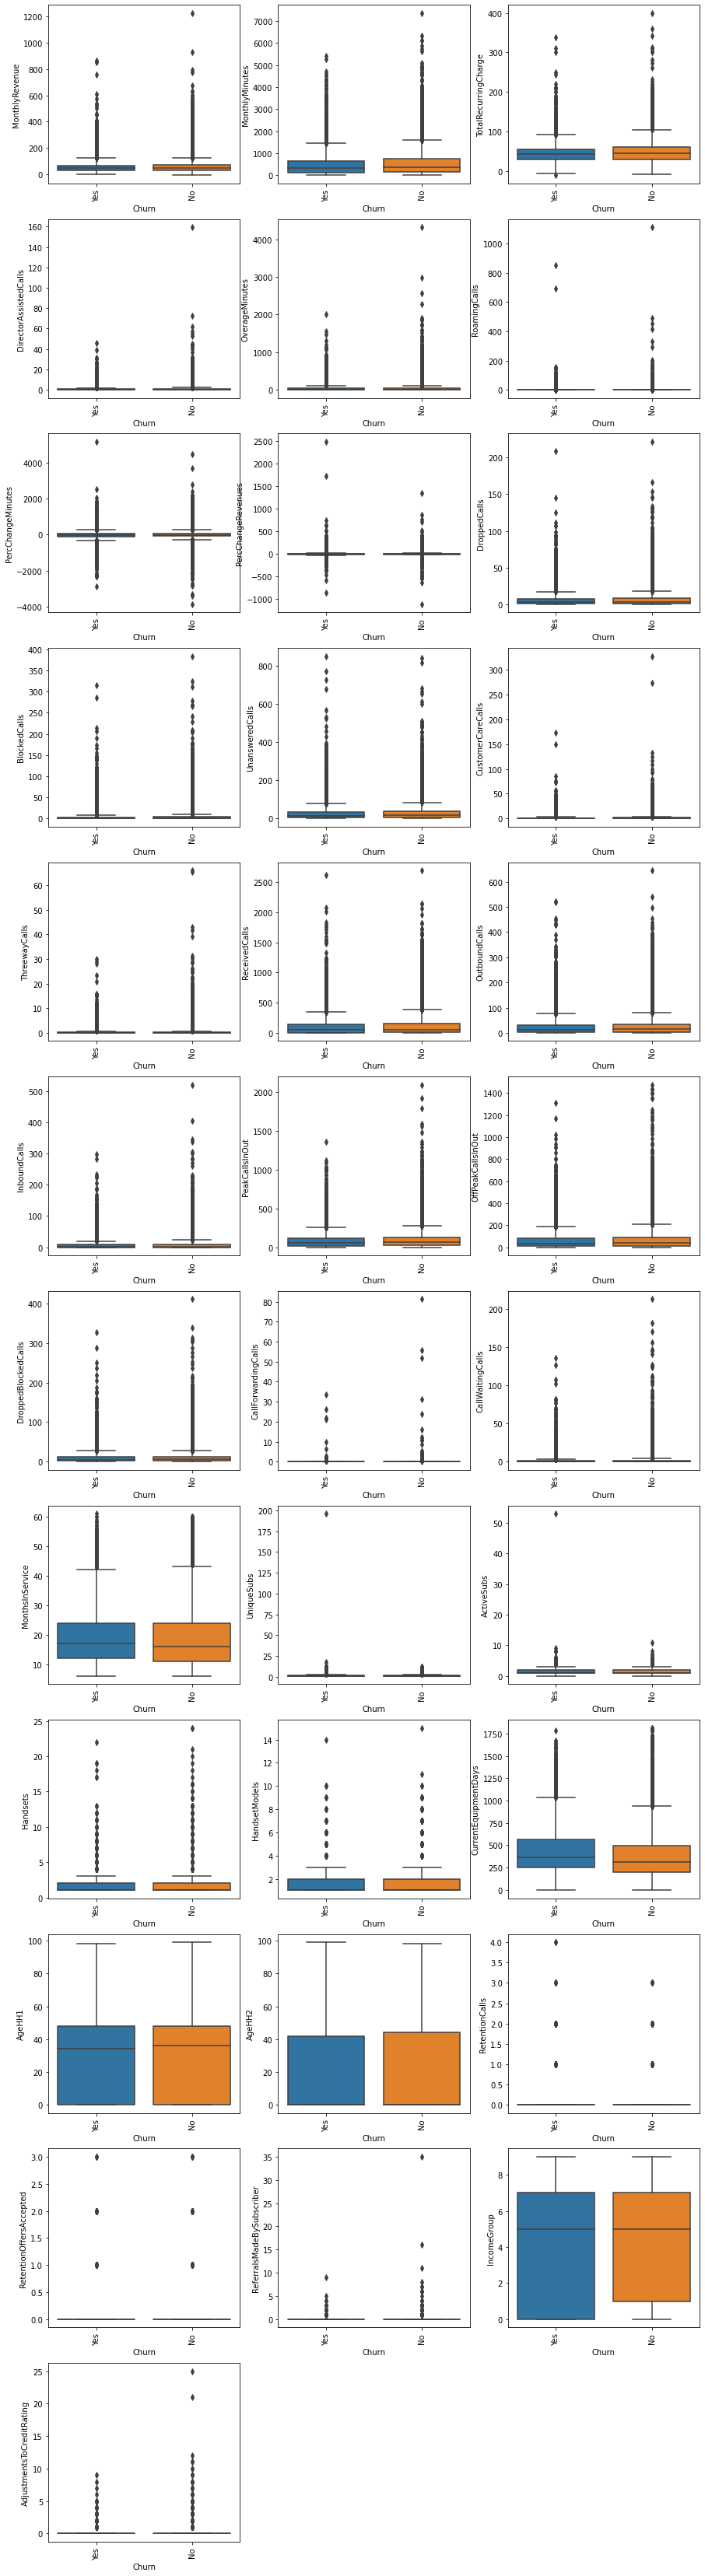

In [51]:
plt.rcParams['figure.figsize']=[15,60]
n=1
for i in nume:
    plt.subplot(12,3,n)
    sns.boxplot(x='Churn',y=i,data=df1)
    n+=1
    plt.xticks(rotation=90)
plt.show()

In [52]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,50890.000000,58.834136,44.507700,-6.170000,33.610000,48.460000,71.060000,1223.380000
MonthlyMinutes,50890.000000,525.663745,529.871145,0.000000,158.000000,366.000000,723.000000,7359.000000
TotalRecurringCharge,50890.000000,46.829298,23.848440,-11.000000,30.000000,45.000000,60.000000,400.000000
DirectorAssistedCalls,50890.000000,0.895247,2.228564,0.000000,0.000000,0.250000,0.990000,159.390000
OverageMinutes,50890.000000,40.028571,96.588862,0.000000,0.000000,3.000000,41.000000,4321.000000
RoamingCalls,50890.000000,1.236268,9.818389,0.000000,0.000000,0.000000,0.300000,1112.400000
PercChangeMinutes,50679.000000,-11.548136,257.517308,-3875.000000,-83.000000,-5.000000,66.000000,5192.000000
PercChangeRevenues,50679.000000,-1.192009,39.575305,-1107.700000,-7.100000,-0.300000,1.600000,2483.500000
DroppedCalls,51046.000000,6.011607,9.044005,0.000000,0.700000,3.000000,7.700000,221.700000
BlockedCalls,51046.000000,4.085752,10.946997,0.000000,0.000000,1.000000,3.700000,384.300000


# 2.DATA CLEANING

In [53]:
# making copy of original data set
df=df1.copy()

### 2.1 Duplicate values

In [54]:
print(df1.duplicated().sum())
print(' ')
print(f'Dataset have {df1.duplicated().sum()} duplicate values.')

0
 
Dataset have 0 duplicate values.


In [55]:
# there are no duplicate values

In [56]:
# AgeHH1 and AgeHH2 has highest null values in the data.

### Treating numerical columns AgeHH1 and AgeHH2

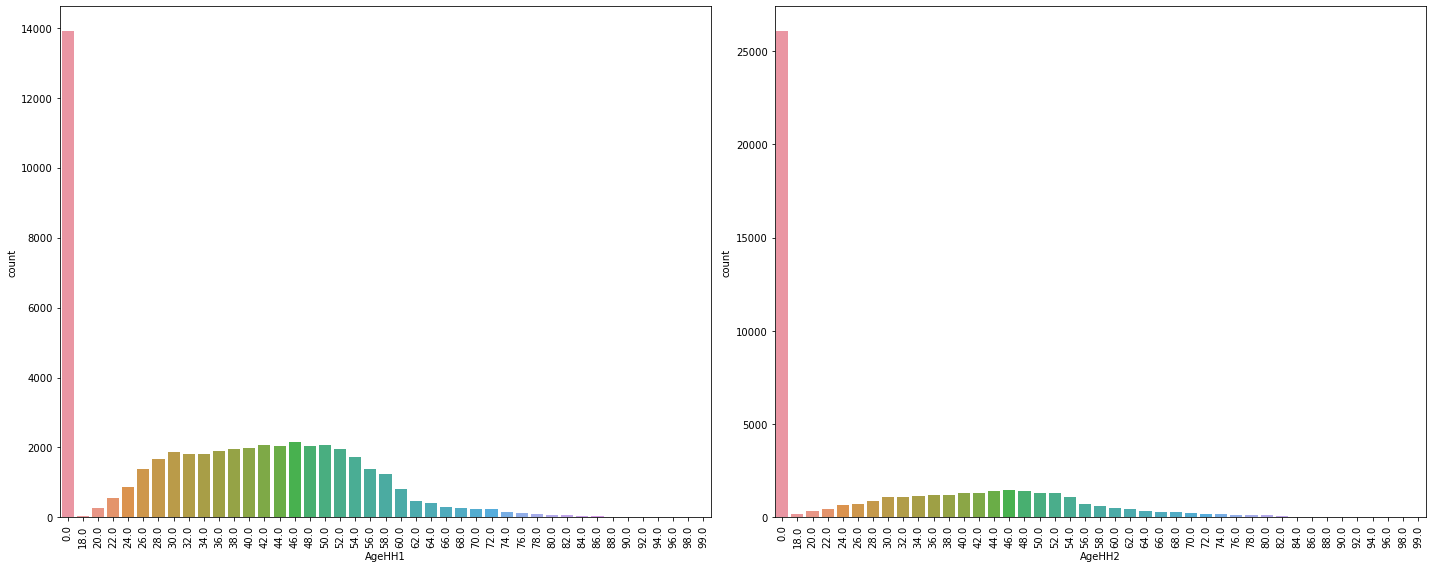

In [57]:
age_cols=['AgeHH1','AgeHH2']
plt.rcParams['figure.figsize']=[20,8]
rows=1
columns=2
iterator=1
for i in age_cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df1.loc[:,i])
    iterator=iterator+1
    plt.xticks(rotation=90)
plt.tight_layout()    
plt.show()

In [58]:
# from graph we can see that there are maximum number of zero values 

In [59]:
df1[df1['AgeHH1']==0].shape

(13916, 54)

In [60]:
df1[df1['AgeHH2']==0].shape

(26086, 54)

In [61]:
# from the graph we can observe that the age columns 'AgeHH2' is having same distribution as AgeHH1,
# since the ageHH2 having more zero values the distribution is lower compare to ageHH1.

<AxesSubplot:>

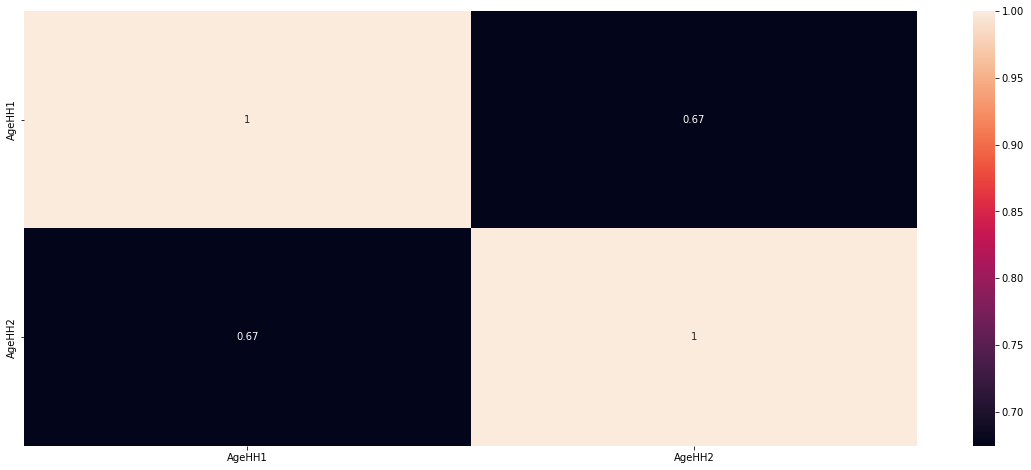

In [62]:
sns.heatmap(df1[['AgeHH1','AgeHH2']].corr(),annot=True)

In [63]:
# we are combining both the age columns because they are redundant.

In [64]:
x=df1['AgeHH1'].to_list()

In [65]:
y=df1['AgeHH2'].to_list()

In [66]:
# defining function to combine the age columns.
def age(x,y):
    s=[]    
    for x,y in zip(x,y):
        if x==0 and y==0:
             s.append(float(0))
        elif x!=0 and y!=0:
             s.append((x+y)//2)
        elif x==0 and y!=0 :
             s.append(y)
        elif y==0 and x!=0:
             s.append(x)
        
    return s       

In [67]:
x=age(x,y)

In [68]:
x.count(0)

13916

In [69]:
# creating new combined column called 'Age'
df1['Age']=x

In [70]:
# comparing the new column with old age columns to cross verify.
df1[['AgeHH1','AgeHH2','Age']]

,AgeHH1,AgeHH2,Age
0,62.000000,0.000000,62.000000
1,40.000000,42.000000,41.000000
2,26.000000,26.000000,26.000000
3,30.000000,0.000000,30.000000
4,46.000000,54.000000,50.000000
...,...,...,...
51042,68.000000,64.000000,66.000000
51043,48.000000,48.000000,48.000000
51044,36.000000,0.000000,36.000000
51045,32.000000,0.000000,32.000000


In [71]:
# comparign the Agehh1 and new age column.

<AxesSubplot:>

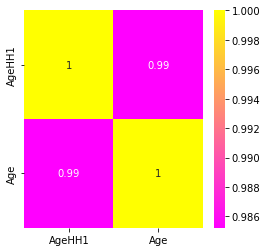

In [72]:
plt.rcParams['figure.figsize']=[4,4]
sns.heatmap(df1[['AgeHH1','Age']].corr(),annot=True,cmap='spring')

conclusion:
* from the corelation we can AgeHH1 and AgeHH2 are  showing 99% correlation.
* lets drop the redundant age columns agehh1 and agehh2 while having age column with in the data.

In [73]:
df1.drop(columns=['AgeHH1','AgeHH2'],inplace=True)

In [74]:
df1.shape

(51046, 53)

### Treating new age variable

In [75]:
df1['Age'].isnull().sum()

909

In [76]:
df1[df1['Age']==0].shape[0]

13916

In [77]:
# we have to treat zeros as null 

In [78]:
df1['Age'].fillna(value=0,inplace=True)

In [79]:
df1[df1['Age']==0].shape[0]/df1.shape[0]*100

29.042432315950318

In [80]:
x=df1['Age'][(df1['Age']==0)&(df1['Churn']=='Yes')]
x.count()             

4455

In [81]:
y=df1['Age'][(df1['Age']==0)&(df1['Churn']=='No')]
y.count()

10370

In [82]:
a=df1['Age'][(df1['Age']!=0)&(df1['Churn']=='Yes')]

In [83]:
a.count()

10256

In [84]:
b=df1['Age'][(df1['Age']!=0)&(df1['Churn']=='No')]

In [85]:
b.count()

25965

In [86]:
t_stat, p_val = stats.ttest_ind(a,b)

# print the test statistic value and corresponding p-value
print('Test Statistic:', t_stat)
print('p-value:', p_val)

Test Statistic: -6.5428840525769365
p-value: 6.114693381777939e-11


* by the statistical test we know that two means are not equal.

In [87]:
# converting zeros to null.
df1['Age']=df1['Age'].replace(to_replace=0,value=np.nan)

## Treating Null values

In [88]:
# checking for missing values
n=pd.Series(df1.isnull().sum()[df1.isnull().sum()!=0])
n

MonthlyRevenue             156
MonthlyMinutes             156
TotalRecurringCharge       156
DirectorAssistedCalls      156
OverageMinutes             156
RoamingCalls               156
PercChangeMinutes          367
PercChangeRevenues         367
Age                      14825
dtype: int64

In [89]:
# calculating percentage of null values.
n/df1.shape[0]*100

MonthlyRevenue           0.305607
MonthlyMinutes           0.305607
TotalRecurringCharge     0.305607
DirectorAssistedCalls    0.305607
OverageMinutes           0.305607
RoamingCalls             0.305607
PercChangeMinutes        0.718959
PercChangeRevenues       0.718959
Age                     29.042432
dtype: float64

### dropping the rows which contain null values less than 1%.

In [90]:
drop_cols=['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls','PercChangeMinutes','PercChangeRevenues']

In [91]:
df1.dropna(subset=drop_cols,inplace=True)

In [92]:
df1.isnull().sum()[df1.isnull().sum()!=0]

Age    14712
dtype: int64

In [93]:
df1=df1.reset_index(drop=True,)

In [94]:
df1.shape

(50679, 53)

In [96]:
num_cols=df1.select_dtypes(include=np.number)
num_cols.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating', 'Age'],
      dtype='object')

### Imputing null values in age column using KNN Imputers

In [97]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_scaled=ss.fit_transform(num_cols)

In [99]:
imputer=KNNImputer(n_neighbors=1000)
df_filled=imputer.fit_transform(num_scaled)

In [100]:
df_filled=pd.DataFrame(df_filled,columns=num_cols.columns)
df_filled

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age
0,-0.783843,-0.580074,-1.045645,-0.289834,-0.414232,-0.125819,-0.564829,-0.449982,-0.588732,-0.310138,-0.567148,-0.367182,-0.256169,-0.107761,-0.723013,-0.491577,-0.312753,-0.472485,-0.570786,-0.020737,-0.276289,4.339230,0.382345,-0.523532,0.146580,0.487141,-0.072301,4.784978,-0.127989,-0.169323,-0.103552,-0.140245,1.587335
1,-0.941334,-0.974398,-1.255508,-0.401835,-0.414232,-0.125819,0.029311,0.030120,-0.632953,-0.373953,-0.659648,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.817997,-0.720326,-0.635004,-0.020737,-0.329856,4.031488,-0.433489,-0.523532,0.146580,-0.616471,4.462720,-0.175702,-0.127989,-0.169323,0.215218,-0.140245,-0.144763
2,-0.469311,-0.978171,-0.374082,-0.401835,-0.414232,-0.125819,0.037078,0.030120,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.688671,-0.714491,-0.491577,-0.853269,-0.691232,-0.654269,-0.020737,-0.329856,4.236649,-0.433489,-0.523532,-0.604989,-0.616471,5.684756,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.381975
3,0.525509,1.482105,1.178906,0.153688,-0.414232,-0.125819,0.654518,0.234795,5.082715,0.328017,1.223762,0.474745,0.855308,0.510956,9.795865,8.311225,4.431774,2.541478,3.179537,-0.020737,3.723433,4.134069,0.382345,0.956226,5.407560,2.694365,0.312561,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.052052
4,-0.937964,-0.993265,-1.255508,-0.401835,-0.414232,-0.125819,0.044845,0.025067,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.865662,-0.731102,-0.654269,-0.020737,-0.329856,3.518585,0.382345,0.956226,1.649717,1.590753,1.875814,-0.175702,-0.127989,-0.169323,1.490301,2.476643,0.597565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50674,-0.605908,-0.874402,-1.255508,-0.401835,0.030554,-0.125819,-0.102720,-0.303424,-0.588732,-0.373953,-0.505481,-0.367182,-0.256169,-0.607056,-0.723013,-0.491577,-0.713135,-0.572699,-0.609317,-0.020737,-0.276289,1.159231,-0.433489,-0.523532,-0.604989,-0.616471,1.998811,-0.175702,-0.127989,-0.169323,-0.422323,-0.140245,1.257411
50675,-0.199712,-0.065001,0.129589,-0.401835,-0.414232,-0.125819,0.044845,0.030120,-0.257068,-0.346604,0.357856,-0.308443,-0.256169,-0.646063,-0.532690,-0.491577,-0.405223,-0.523131,-0.397398,-0.020737,-0.276289,1.159231,-0.433489,-0.523532,-0.604989,-0.616471,1.994844,-0.175702,-0.127989,-0.169323,-1.378634,-0.140245,0.146065
50676,0.294328,0.372717,0.969042,-0.401835,-0.372857,-0.034137,-0.110486,-0.020417,0.914810,-0.282788,-0.130341,-0.367182,1.197301,-0.269792,0.007031,-0.473612,1.631959,-0.594251,0.328264,-0.020737,-0.204865,1.159231,-0.433489,-0.523532,-0.604989,-0.616471,1.994844,-0.175702,-0.127989,-0.169323,0.852760,-0.140245,1.009969
50677,1.316557,-0.268766,-0.709864,-0.401835,2.171737,-0.125819,0.044845,0.030120,-0.223902,-0.282788,-0.035271,-0.367182,-0.256169,-0.560847,-0.686085,-0.491577,0.080956,-0.145982,-0.333180,-0.020737,-0.329856,1.159231,-0.433489,-0.523532,0.146580,0.487141,0.435558,-0.175702,-0.127989,-0.169323,-0.741093,-0.140245,-1.711899


In [101]:
num_scaled=df_filled

In [102]:
scaled_cols=num_scaled.columns

### Imputing null values in MaritalStatus using KNN Classifier

In [104]:
df1['MaritalStatus'].value_counts()

Unknown    19556
Yes        18520
No         12603
Name: MaritalStatus, dtype: int64

In [105]:
dict_1={'Unknown':np.nan,'Yes':1,'No':0 }

In [106]:
mar=df1['MaritalStatus']

In [107]:
mar=mar.map(dict_1)

In [108]:
mar.isnull().sum()

19556

In [109]:
df_mar=pd.concat([num_scaled,mar],axis=1)

In [110]:
x_train = df_mar[scaled_cols][~(df_mar['MaritalStatus'].isnull()==True)]

In [111]:
x_train.shape

(31123, 33)

In [112]:
y_train=df_mar['MaritalStatus'][~(df_mar['MaritalStatus'].isnull()==True)]

In [113]:
y_train.shape

(31123,)

In [114]:
x_test= df_mar[scaled_cols][(df_mar['MaritalStatus'].isnull()==True)]

In [115]:
x_test.shape

(19556, 33)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [117]:
y_pred.shape

(19556,)

In [118]:
index_list=df_mar[df_mar['MaritalStatus'].isnull()==True].index

In [120]:
df_mar['MaritalStatus'][index_list]=y_pred

In [121]:
df_mar.shape

(50679, 34)

In [122]:
dict_2={1:'Yes',0:'No' }

In [123]:
df_mar['MaritalStatus']=df_mar['MaritalStatus'].map(dict_2)

In [124]:
df_mar['MaritalStatus'].value_counts()

No     25388
Yes    25291
Name: MaritalStatus, dtype: int64

In [125]:
df1['New_maritalstatus']=df_mar['MaritalStatus']

<AxesSubplot:xlabel='New_maritalstatus', ylabel='count'>

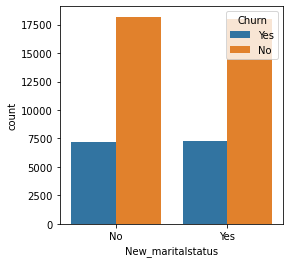

In [126]:
sns.countplot(df1['New_maritalstatus'],hue=df1['Churn'])

In [127]:
# we do chi2 test of independence to check dependency on target variable

In [128]:
table = pd.crosstab(df1['Churn'], df1['New_maritalstatus'])
observed_values=table.values


In [129]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_values, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 1.503467327320669
p-value: 0.22013862680151292
Degrees of freedom: 1
Expected values: [[18122.62057262 18053.37942738]
 [ 7265.37942738  7237.62057262]]


### performing two_sample proportion test


In [130]:
table = pd.crosstab(df1['Churn'], df1['New_maritalstatus'])
table

New_maritalstatus,No,Yes
Churn,,
No,18185,17991
Yes,7203,7300


* Ho: Prop(marrried_churners) = Prop (unmarried_churners)
* Ha: Not equal

In [131]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest([7203,7300],[25388,25291])

(-1.2261595847689, 0.22013862680152074)

* here p_value is > 0.05,hence we accept Ho ,proprtions are same.
* since model preffered  is non linear we are proceeding with this column.

In [132]:
df1=df1.drop('MaritalStatus',axis=1)

In [133]:
df1.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,Age,New_maritalstatus
0,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,0,4,No,0,Yes,High,Suburban,Professional,62.000000,No
1,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,0,5,No,0,No,Medium,Suburban,Professional,41.000000,Yes
2,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,0,6,No,0,No,Medium,Town,Crafts,26.000000,Yes
3,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,0,6,No,0,No,Medium,Other,Other,30.000000,No
4,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,0,9,No,1,No,High,Other,Professional,50.000000,Yes


In [134]:
# by the test we come to know that two variables are independent.

## Outliers analysis

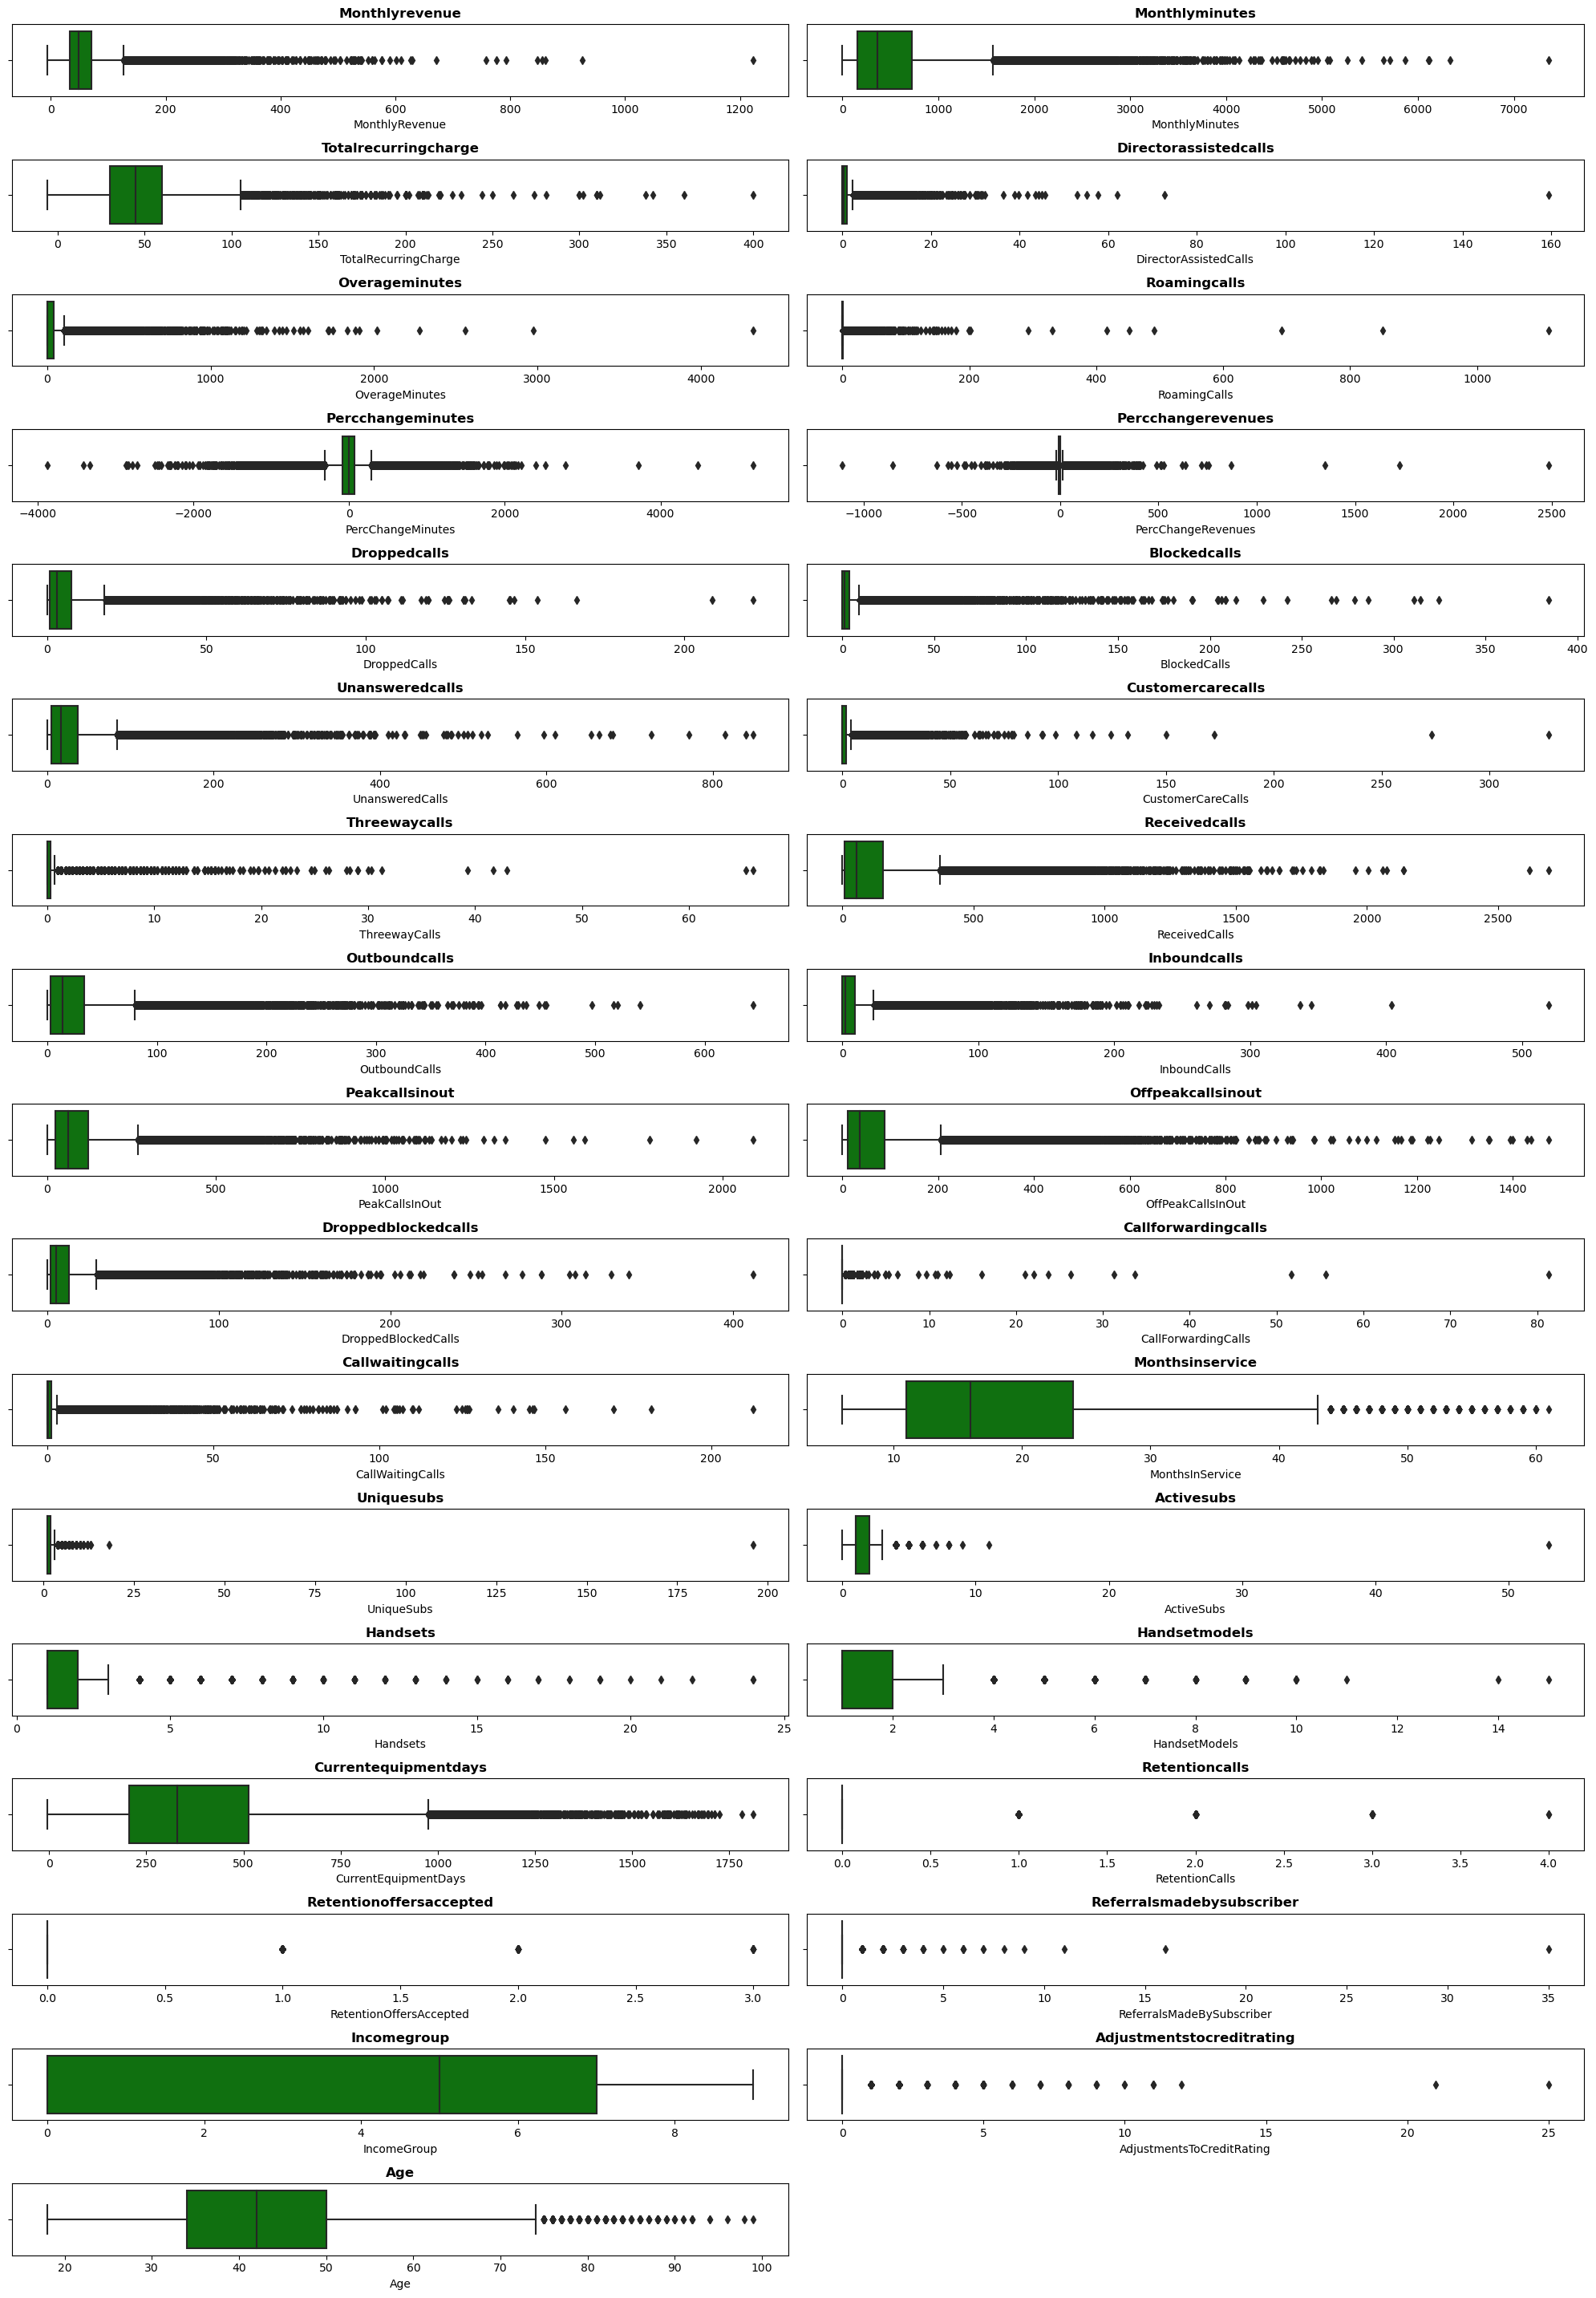

In [135]:
plt.figure(figsize=(20,30),dpi=100)
n=1
for i in df1.describe().columns:
    plt.subplot(18,2,n)
    n+=1
    sns.boxplot(df1[i],color='green')
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

**Inference:** By Visualizing above Boxplot we can see that all the Features have potential outliers and some of the  features have certain extreme values.

**Reason for outliers exist in the data:**
1. Variability in the Data
2. An experimental measurment error

**Impact of outliers on Dataset:**
1. it causes various problem during statstical analysis
2. It effects the mean and standard deviation


### Skewness Before Transformation

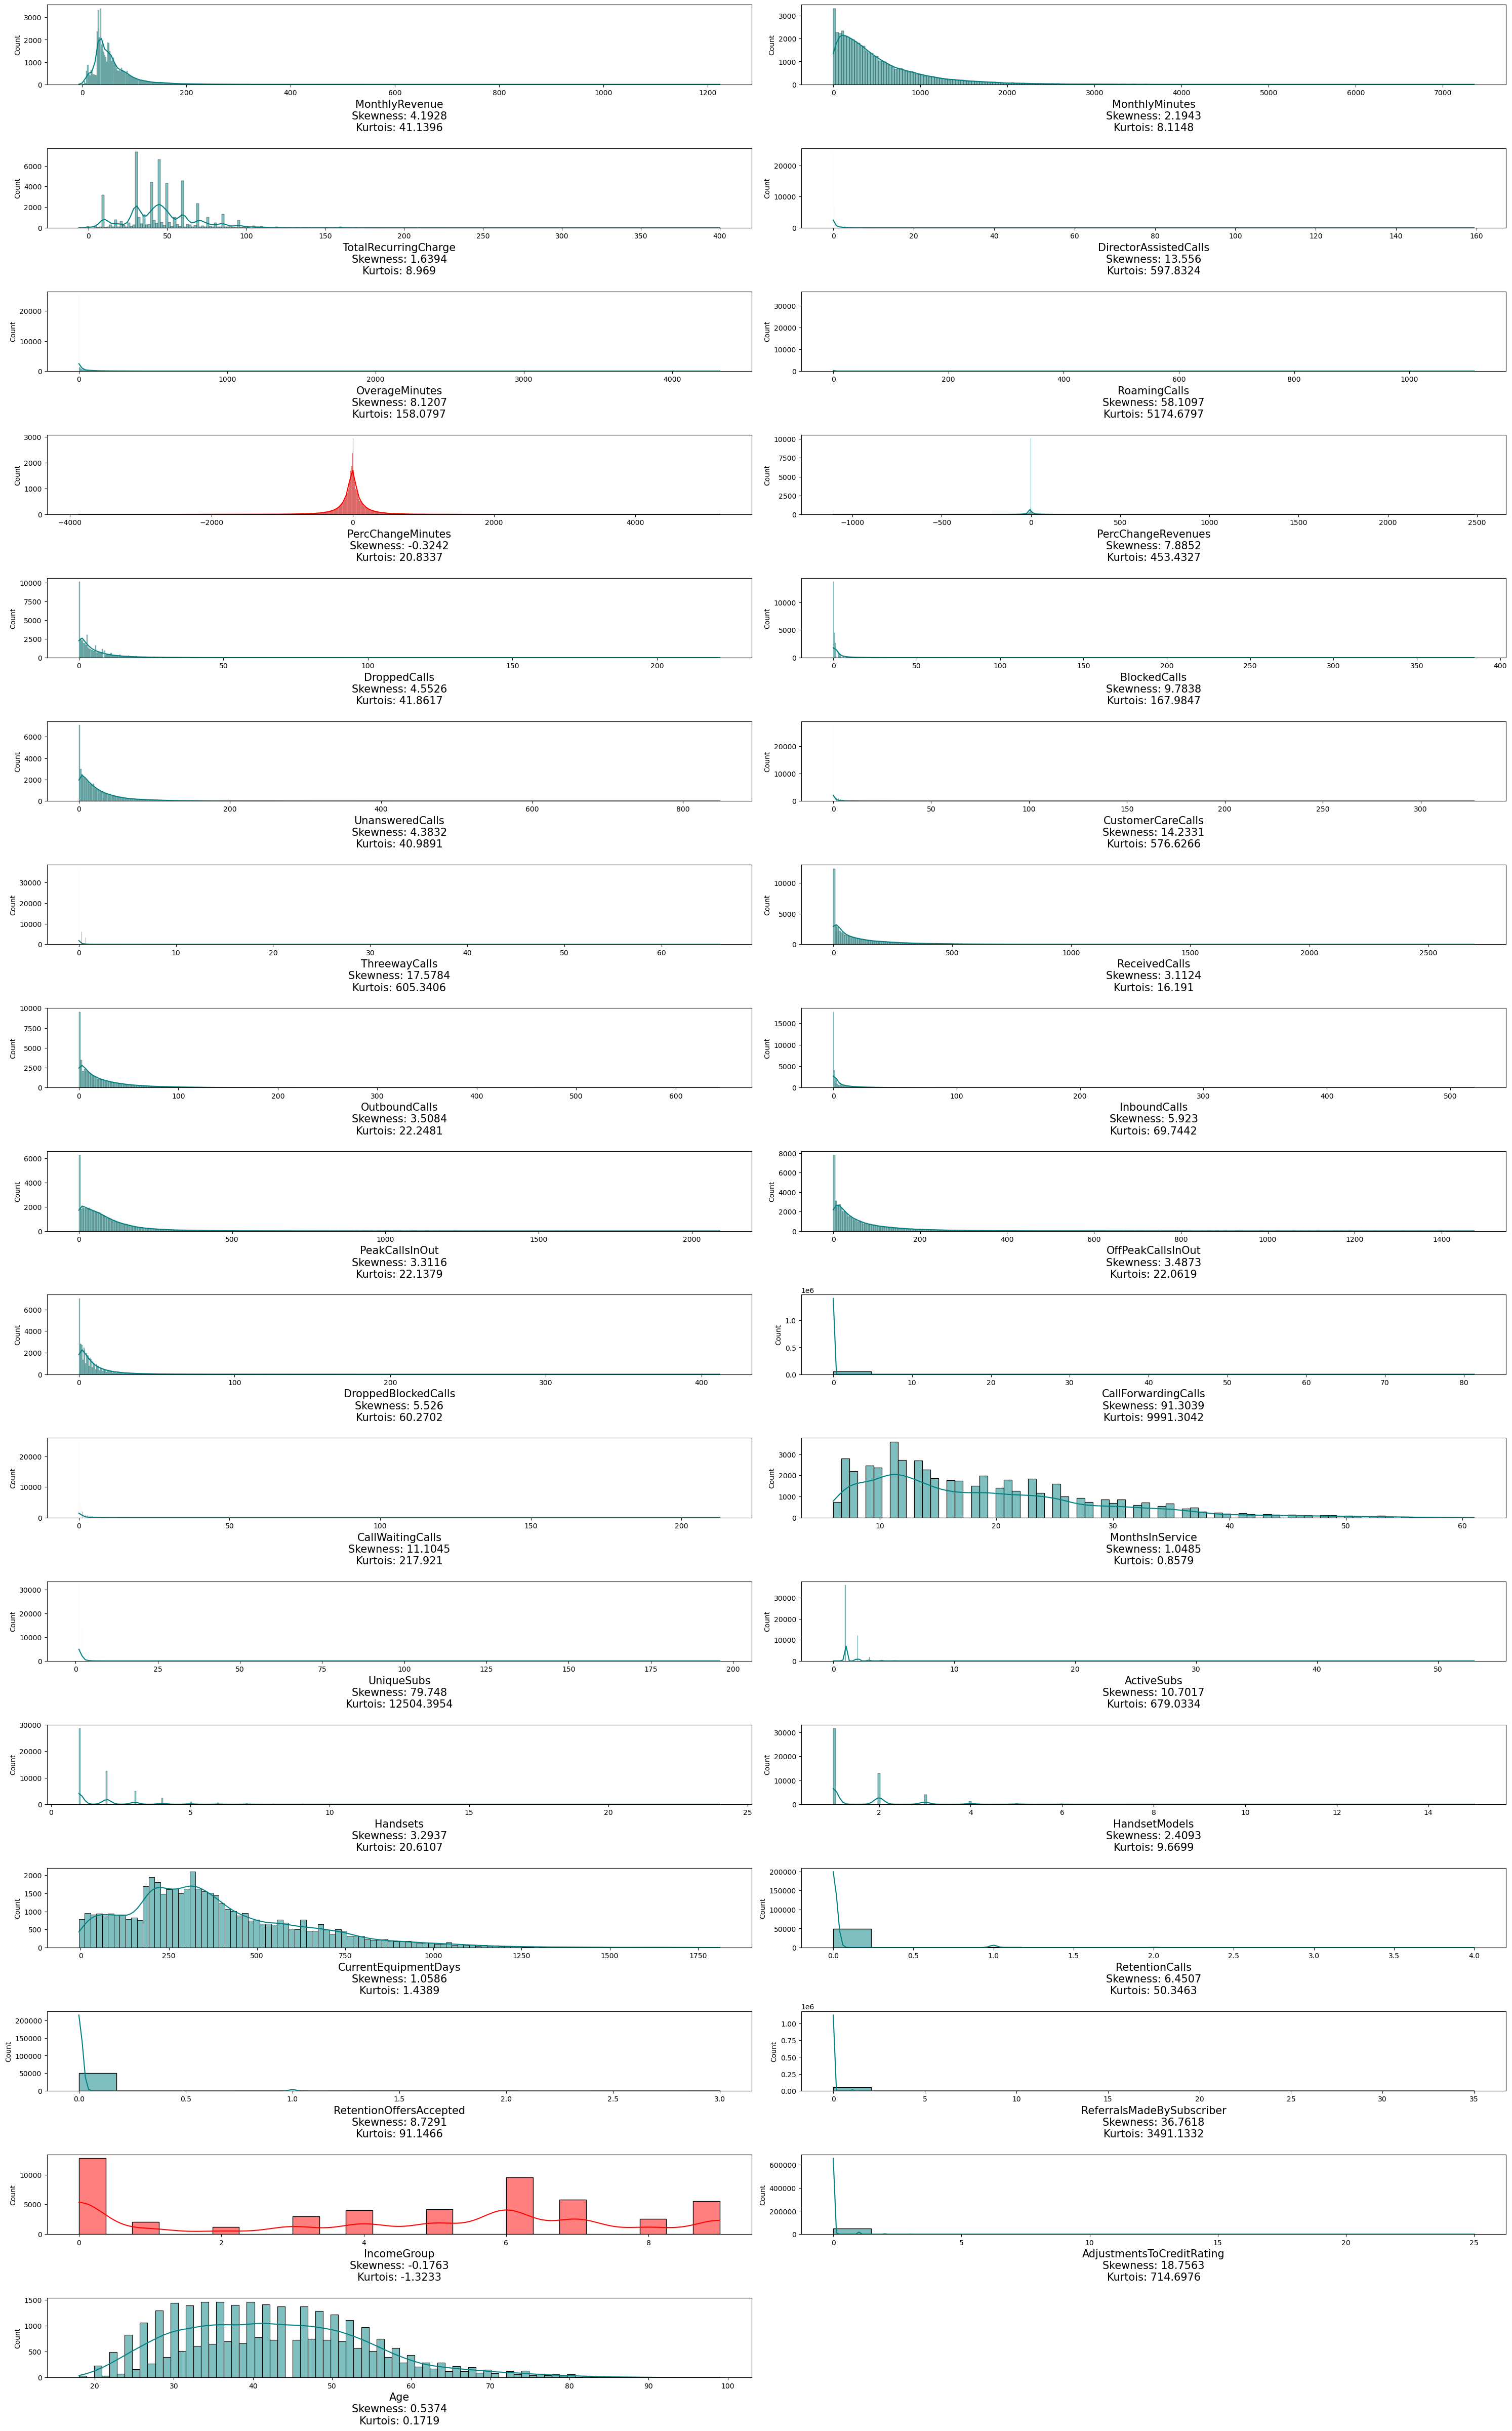

In [136]:
#checking and visualizing skewness of each feature by using dist plot
#checking skewness and normallity of data by visualizing graphs
plt.figure(figsize=(30,50),dpi=100)
n=1
for i in df1.describe().columns:
    plt.subplot(18,2,n)
    n+=1
    if df1[i].skew() < 0 :
        sns.histplot(df1[i] ,color='red',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df1[i].skew(),4)}\nKurtois: {round(df1[i].kurt(),4)}",fontsize=15)
    else:
        sns.histplot(df1[i],color='teal',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df1[i].skew(),4)}\nKurtois: {round(df1[i].kurt(),4)}",fontsize=15)
plt.tight_layout()

# Descriptive Statistics 

## univariate analysis

In [137]:
df1['Churn'].value_counts()

No     36176
Yes    14503
Name: Churn, dtype: int64

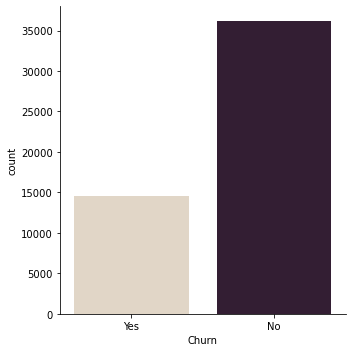

In [138]:
sns.catplot(x="Churn", kind="count", palette="ch:.25", data=df1)

## univariate analysis on categorical column

In [139]:
# List only the Categorical columns
df_cat = df1.select_dtypes(include=['object']).columns
print(df_cat)

Index(['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
       'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'HasCreditCard', 'NewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'New_maritalstatus'],
      dtype='object')


In [140]:
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

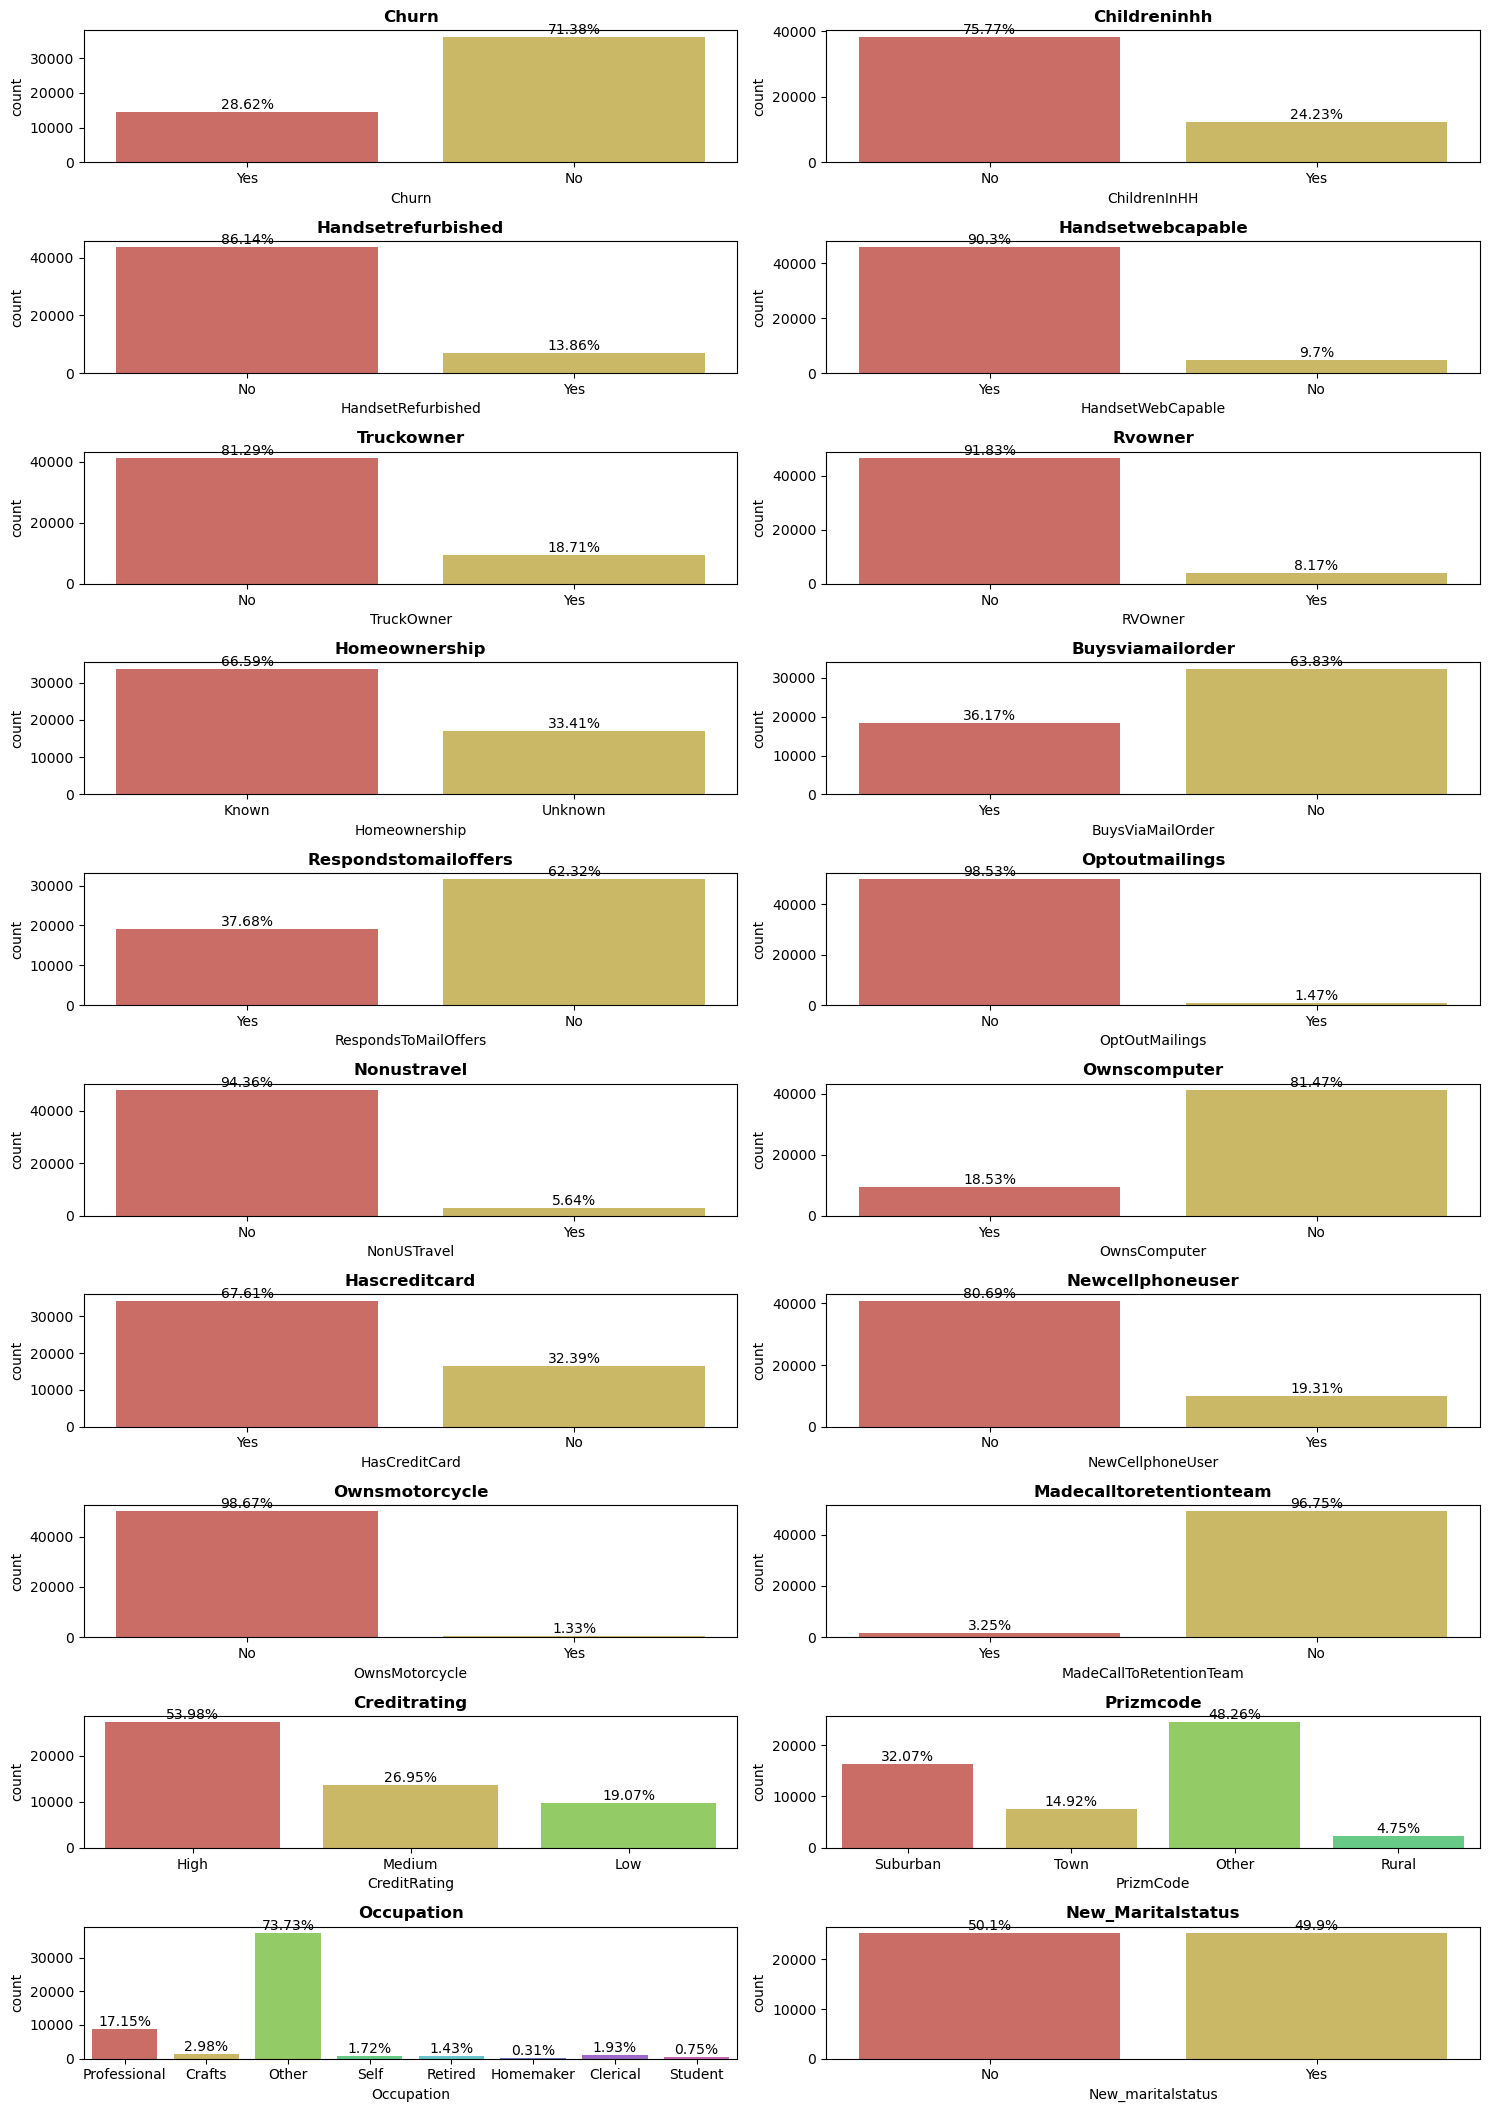

In [141]:
#plotting countplot for some categorical variable

plt.figure(figsize=(15,25),dpi=100)
n=1
for i in df_cat:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.countplot(df1[i] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

#### Obeservations

1) Churn Over 28 percent of people in the data have churned.

2) Handseter capable More than 90 percent of the people in the data have internet support on their phone.

3) More than 65 percent of them don't have a credit card 

4) Less than 2 percent of them own a motorcycle

5) In occupations category over 73% are 'other'.

6) new_marital status has almost equal count.




## Univariate Analysis on Numerical Columns

In [142]:
df_num=df1.select_dtypes(include=np.number)

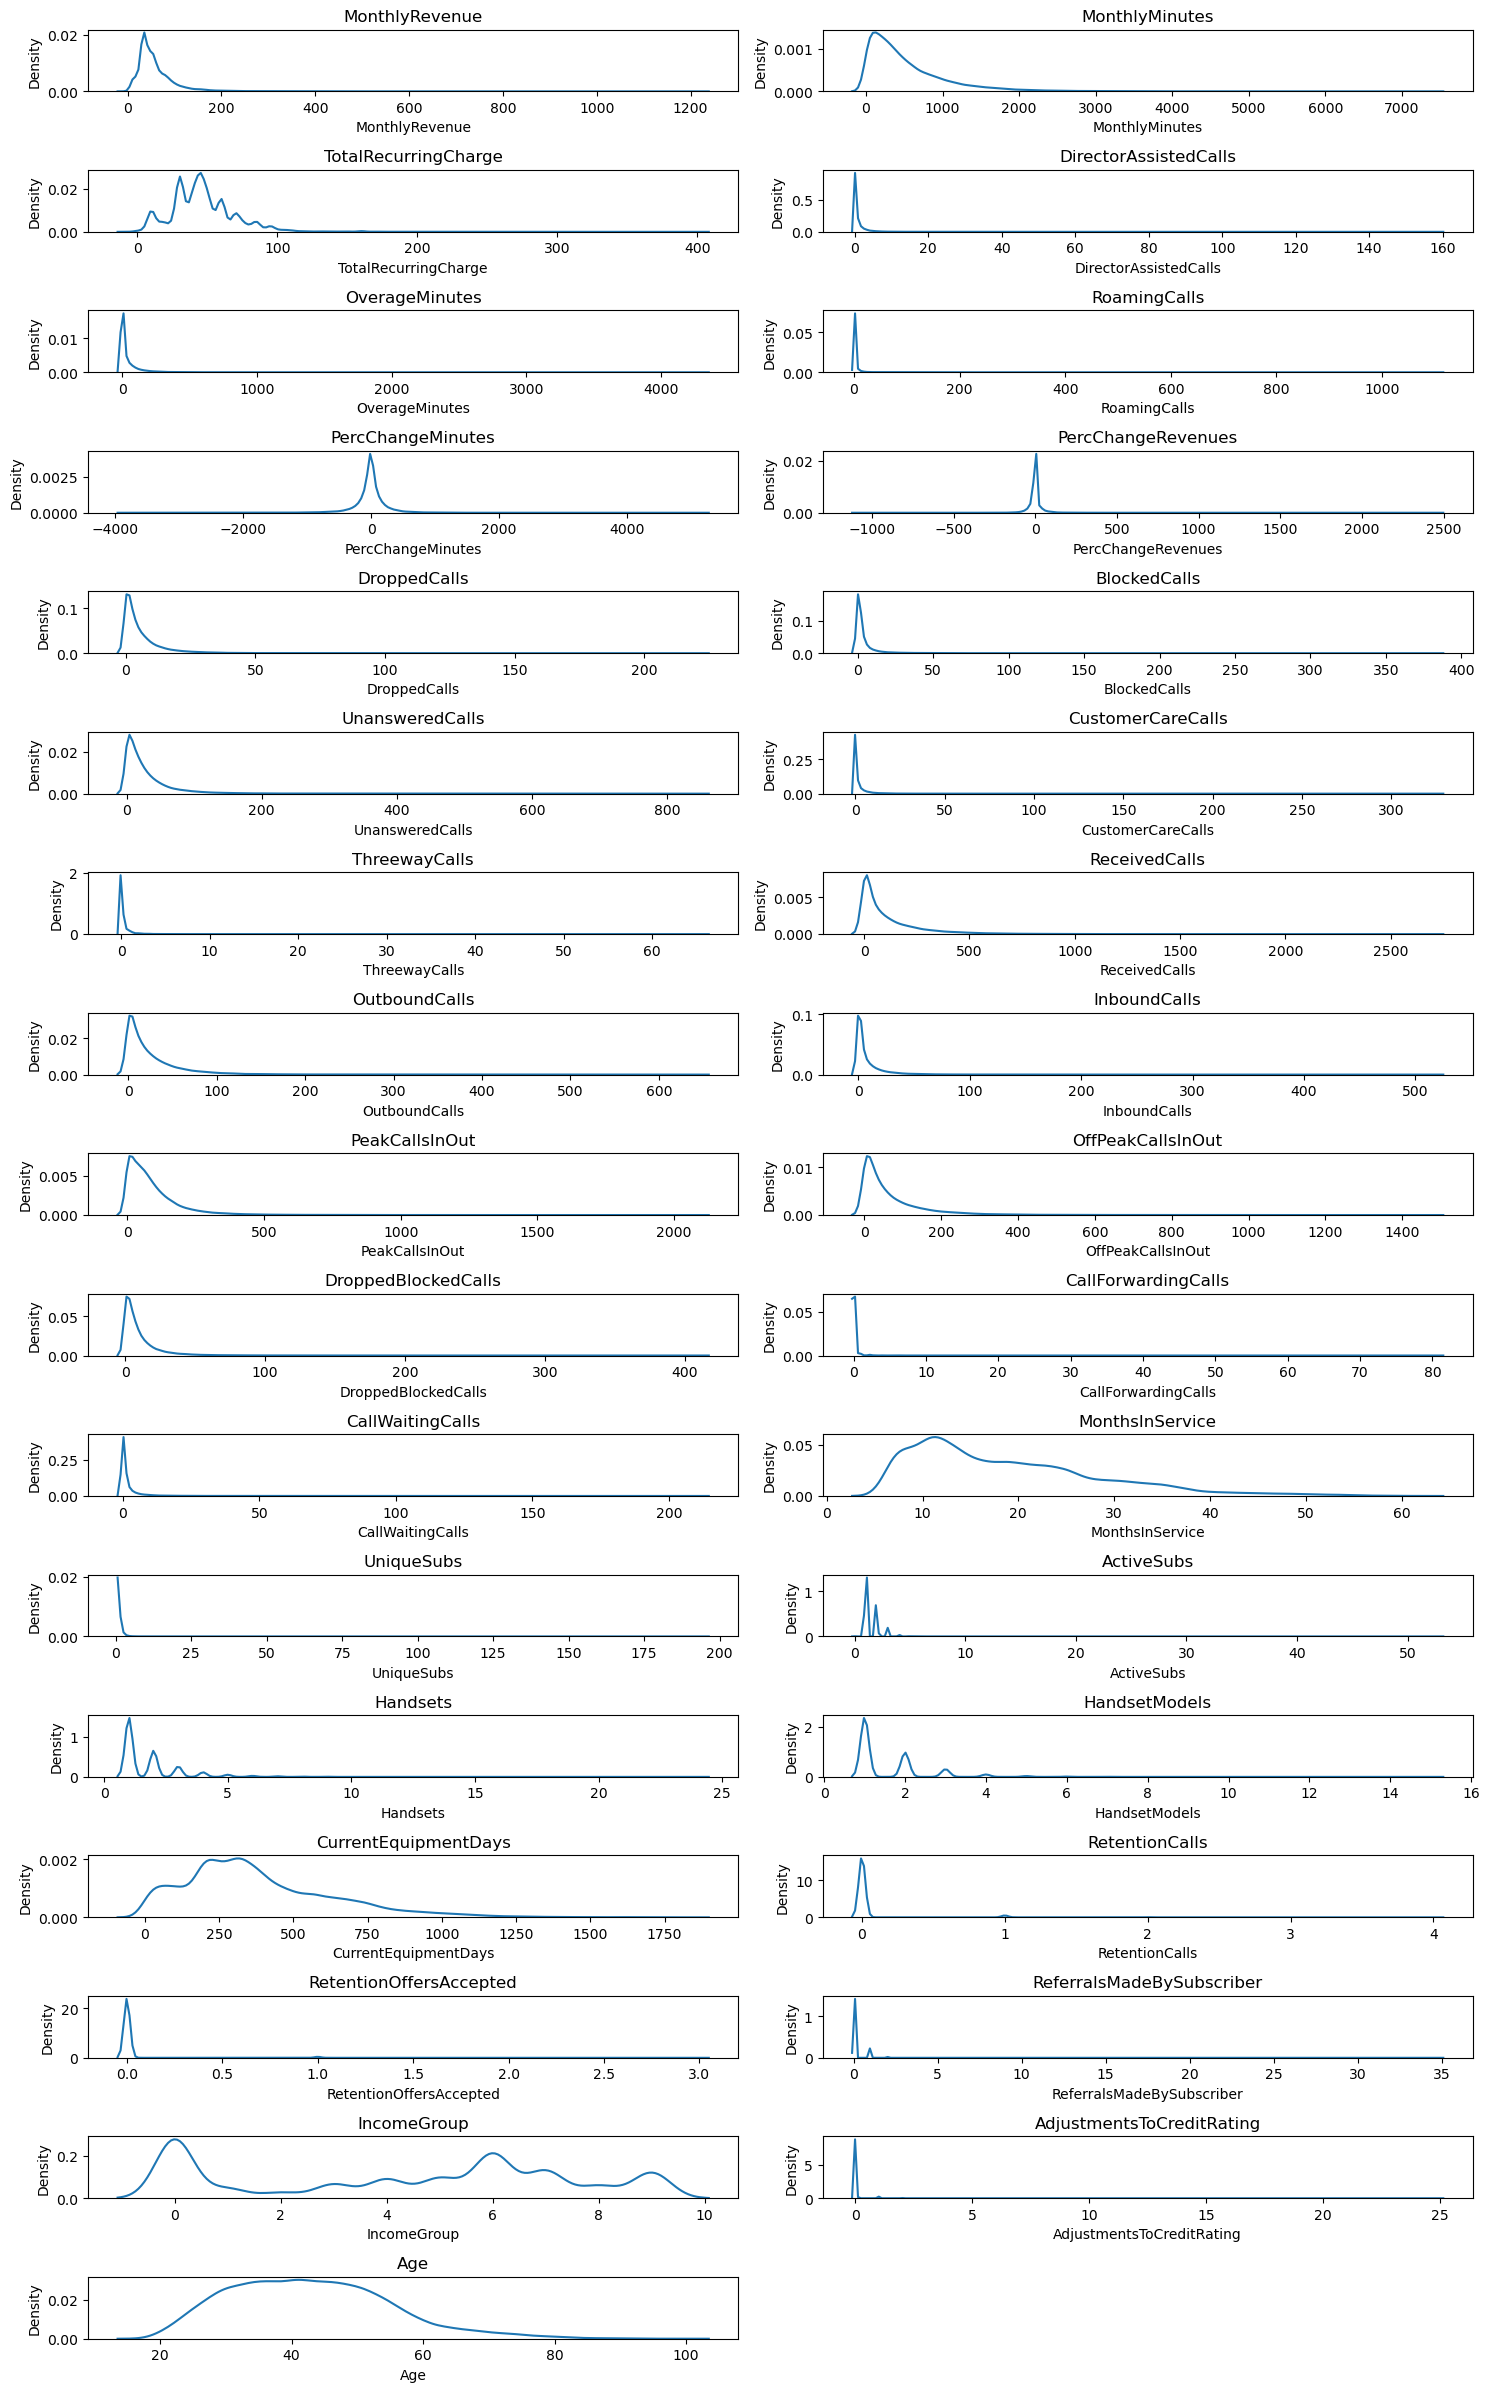

In [143]:
# Kde Plot for Numerical features

plt.figure(figsize=(15,25),dpi=100)
n=1
for i in df_num:
    plot=plt.subplot(18,2,n)
    n+=1
    plt.title(i)
    sns.kdeplot(data=df1[i])
    plt.tight_layout()
    annot_percent(plot)

## Bivariate Analysis

### Bivariate Analysis on Categorical - Categorical

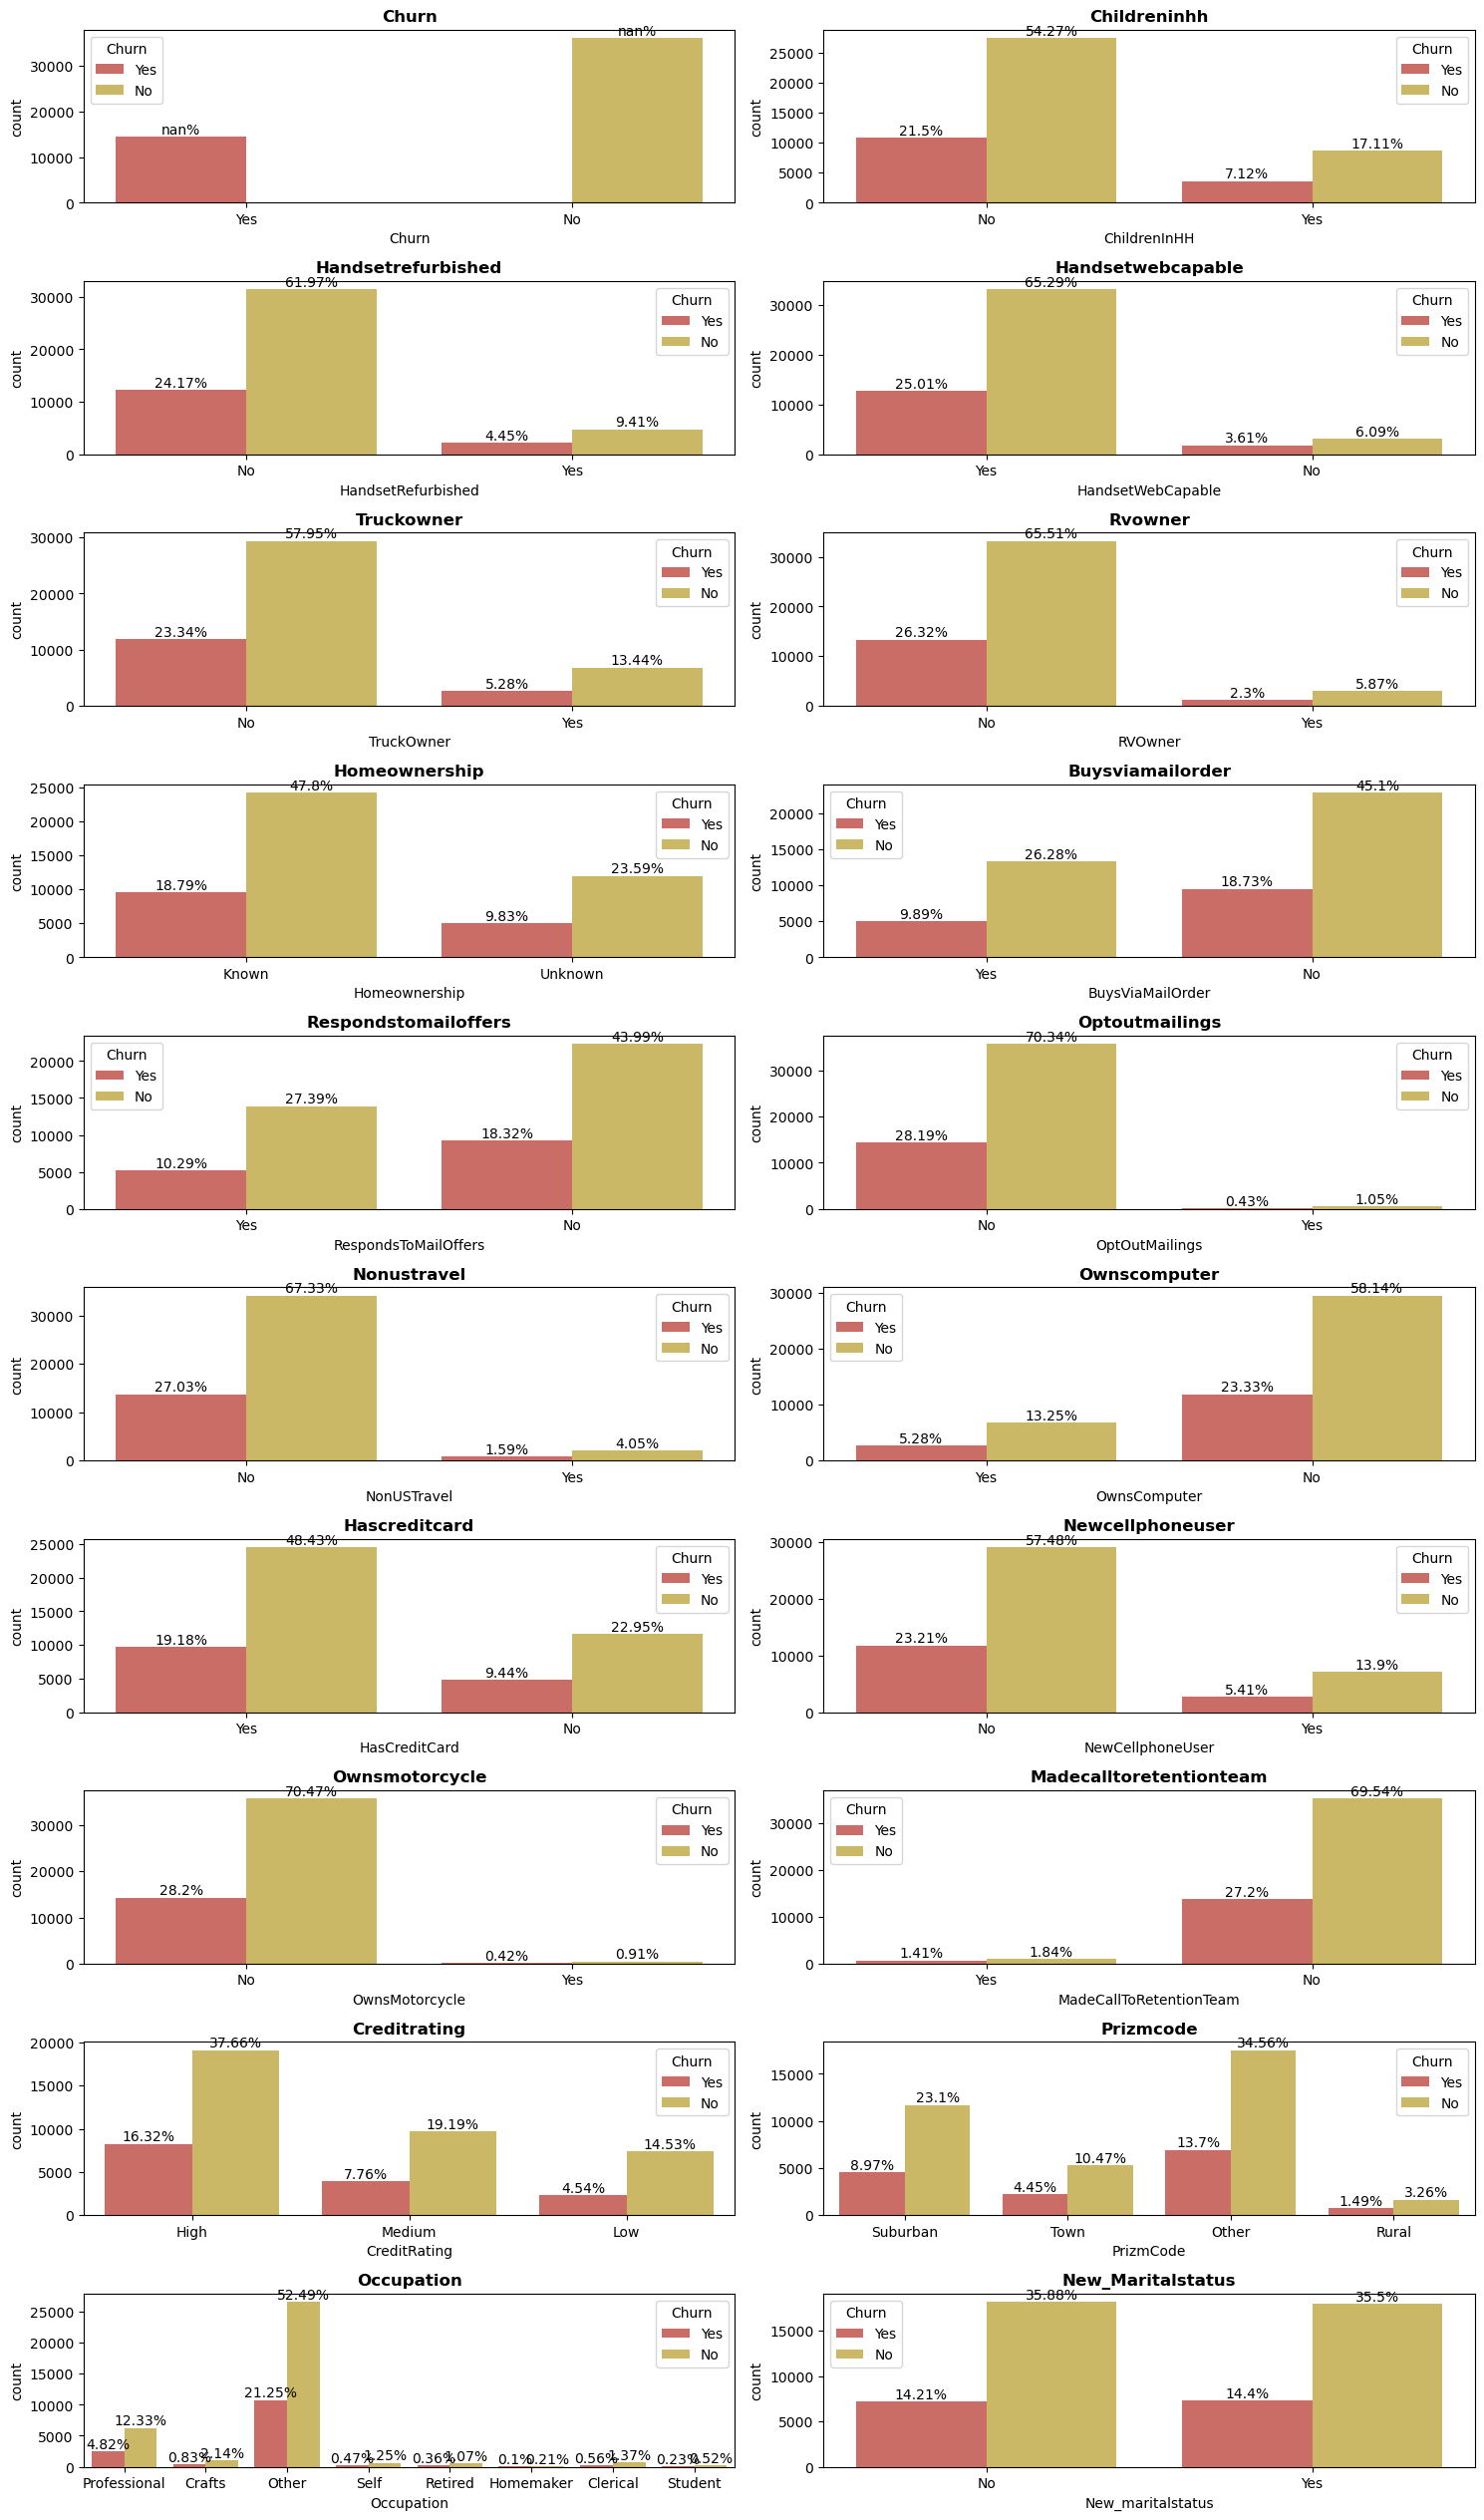

In [144]:
plt.figure(figsize=(15,30),dpi=100)
n=1
for i in df_cat:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.countplot(df1[i],hue= df1['Churn'] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot) 

###  observation:

1. In Handset web capability over 25% of people who have churned has more than 90% of Internet capability on their phone.


2. Less than 6% of people who own New phone have churned


3. Data show that people who have Credit Cards are more likely to Churn


4. Marital Status of people churning is independent


5. People who have responded mail offer are less likely to churn

## Multivariate Analysis

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='MonthlyMinutes'>

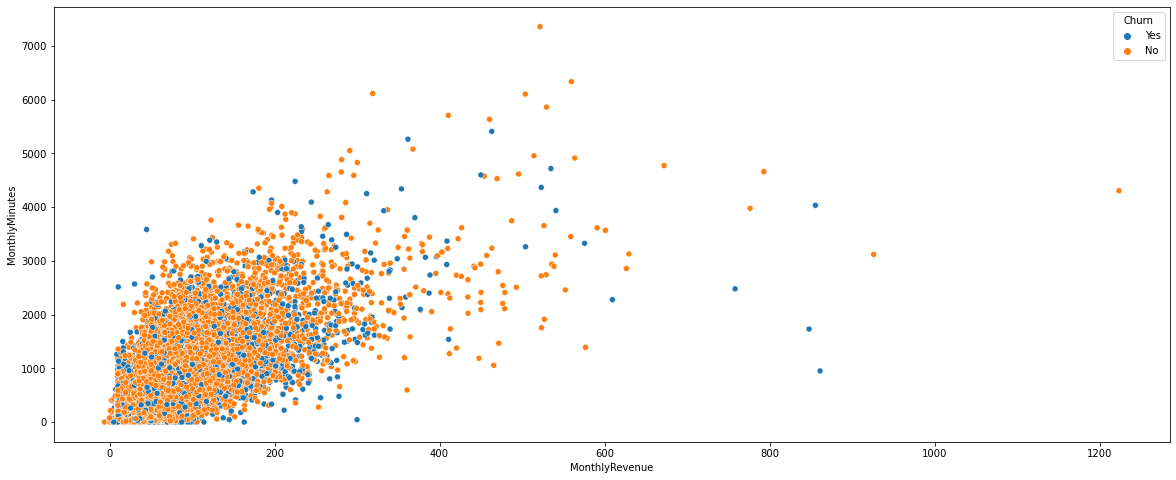

In [145]:
plt.rcParams['figure.figsize']=[20,8]
sns.scatterplot(x="MonthlyRevenue", y="MonthlyMinutes",hue='Churn', data=df1)

### Observation

According plot as number of Monthly Minutes increases ,Monthly Revenue is increasing, and churn points are completely overlapping.

# Statistics

## **Chi-Square Test for Independence**

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

Here we can check if the catagorical features are dependent on our target.<br>
We are assuming the level of confidence as 95%

In [146]:
# taking only the catagorical variables
df_categorical=df1.select_dtypes(include=object)
df_categorical.head()

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,Yes,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,Yes,High,Suburban,Professional,No
1,Yes,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Medium,Suburban,Professional,Yes
2,No,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,Medium,Town,Crafts,Yes
3,No,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,No,No,Medium,Other,Other,No
4,Yes,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,High,Other,Professional,Yes


In [147]:
# taking only the features from catagories
df_categorical_features=df_categorical.drop('Churn',axis=1)
df_target=df_categorical['Churn']

In [175]:
for i in df_categorical_features.columns:
    
    print('for: ',i)
    
    print('The null and alternative hypothesis is:')
    print(' ')
    print('H0: The variables {} and churn are independent'.format(i))
    print('H1: The variables {} and churn are not independent'.format(i))
    print('')
    
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    
    # use the 'chi2_contingency()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
    # pass the observed values to the parameter, 'observed'
    # 'correction = False' will not apply the Yates' correction
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

    print("Test statistic:", test_stat)
    print("p-value:", p)
    print("Degrees of freedom:", dof) 
    print("Expected values:", '\n',expected_value)
    
    if p > 0.05:
        print('The above output shows that the chi-square the p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables {} and Churn are independent.'.format(i))
    else:
        print('The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables {} and Churn are dependent.'.format(i))        

for:  ChildrenInHH
The null and alternative hypothesis is:
 
H0: The variables ChildrenInHH and churn are independent
H1: The variables ChildrenInHH and churn are not independent

Test statistic: 4.698156215718356
p-value: 0.030194993311185508
Degrees of freedom: 1
Expected values: 
 [[27409.49995067 10988.50004933]
 [ 8766.50004933  3514.49995067]]
The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables ChildrenInHH and Churn are dependent.
for:  HandsetRefurbished
The null and alternative hypothesis is:
 
H0: The variables HandsetRefurbished and churn are independent
H1: The variables HandsetRefurbished and churn are not independent

Test statistic: 47.97838353216636
p-value: 4.309441911549537e-12
Degrees of freedom: 1
Expected values: 
 [[31163.51214507 12493.48785493]
 [ 5012.48785493  2009.51214507]]
The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  t

Test statistic: 144.79211724306955
p-value: 3.6206890545132067e-32
Degrees of freedom: 2
Expected values: 
 [[19527.43061229  7828.56938771]
 [ 6899.84443261  2766.15556739]
 [ 9748.72495511  3908.27504489]]
The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables CreditRating and Churn are dependent.
for:  PrizmCode
The null and alternative hypothesis is:
 
H0: The variables PrizmCode and churn are independent
H1: The variables PrizmCode and churn are not independent

Test statistic: 18.839355979101004
p-value: 0.00029512488374545005
Degrees of freedom: 3
Expected values: 
 [[17457.33451726  6998.66548274]
 [ 1718.89358511   689.10641489]
 [11603.24552576  4651.75447424]
 [ 5396.52637187  2163.47362813]]
The above output shows that the chi-square the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables PrizmCode and Churn are dependent.
for:  Occupation


In [153]:
print('The dependent categorical variable found after Chi-Square Test for Independence are:')
print('')
for i in df_categorical_features.columns:
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    if p < 0.05:
        print(i)

The dependent categorical variable found after Chi-Square Test for Independence are:

ChildrenInHH
HandsetRefurbished
HandsetWebCapable
Homeownership
BuysViaMailOrder
RespondsToMailOffers
MadeCallToRetentionTeam
CreditRating
PrizmCode


In [154]:
print('The independent categorical variable found after Chi-Square Test for Independence are:')
print('')
for i in df_categorical_features.columns:
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    if p > 0.05:
        print(i)

The independent categorical variable found after Chi-Square Test for Independence are:

TruckOwner
RVOwner
OptOutMailings
NonUSTravel
OwnsComputer
HasCreditCard
NewCellphoneUser
OwnsMotorcycle
Occupation
New_maritalstatus


## Checking significance for numerical features

In [156]:
df_num=df1.select_dtypes(include=np.number)
df_target=df_categorical['Churn']
df_num.head(2)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age
0,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,1,0,0,4,0,62.000000
1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,0,0,0,5,0,41.000000


### Jarque-Bera test

The null and alternative hypothesis for jarque_bera is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data is normally distributed. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data is not normally distributed. </strong></p>

Assuming the level of confidence as 95%

In [162]:
# importing jarque_bera function from the scipy.stats library
from scipy.stats import jarque_bera

In [176]:
def get_jarque_bera(Churn_Yes_set,Churn_No_set):
    stat_co,p_co=jarque_bera(Churn_Yes_set)
    stat_fp,p_fp=jarque_bera(Churn_No_set)
    if p_co > 0.05 and p_fp > 0.05:
        print('Since the pvalue of both the Churners and non_churners are greater then 0.05, we donot have enough evidence to reject the null hypothesis for both')
        print('Both sets are normaly distributed')
    elif p_co < 0.05 and p_fp < 0.05: 
        print('Since the pvalue of both the Churners and non_churnersare lesser then 0.05, we reject the null hypothesis')
        print('Both sets are not normaly distributed')
    elif p_co < 0.05 or p_fp < 0.05: 
        print('Since the pvalue of either the Churners and non_churners are lesser then 0.05, we reject the null hypothesis of the variable with p_value < 0.05 ')
        print('Either one of sets is not normaly distributed')

#### we will saperate each numerical column into two sets according to the target variable which are in this case Yes and No

In [177]:
for i in df_num.columns:
    print('Checking the normality of the two separated sets of {} column according to target'.format(i))
    print()
    Churn_Yes_set=df1[df1['Churn']=='Yes'][i]
    Churn_No_set=df1[df1['Churn']=='No'][i]
    print(get_jarque_bera(Churn_Yes_set,Churn_No_set))

Checking the normality of the two separated sets of MonthlyRevenue column according to target

Since the pvalue of both the Churners and non_churnersare lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Checking the normality of the two separated sets of MonthlyMinutes column according to target

Since the pvalue of both the Churners and non_churnersare lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Checking the normality of the two separated sets of TotalRecurringCharge column according to target

Since the pvalue of both the Churners and non_churnersare lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Checking the normality of the two separated sets of DirectorAssistedCalls column according to target

Since the pvalue of both the Churners and non_churnersare lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Checking th

Inference:
1. we can see that none of the sets of the numerical features separated by the target variables are normally distributed,therefore we can opt for `kruskal wallis test` to check its dependence on the target variable

### Kruskal wallis test

The null and alternative hypothesis for `kruskal wallis test` is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data samples are with equal median (independent). </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data samples do not have equal median(i.e. variables are dependent). </strong></p>

Assuming the level of confidence as 95%

In [166]:
# importing the kruskal function from the scipy.stats library 
from scipy.stats import kruskal

In [188]:
x=df1['Churn'].value_counts().index[0]
y=df1['Churn'].value_counts().index[1]


H0: The median of No category and median of Yes category is same


In [192]:
for i in df_num.columns:
    
    print('for: ',i)
    
  
    Churn_Yes_set=df1[df1['Churn']=='Yes'][i]
    Churn_No_set=df1[df1['Churn']=='No'][i]
    
    # use the 'kruskal()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value
    # pass the separated values of each numerical columns according to the target variable which
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)

    print("Test statistic:", test_stat)
    print("p-value:", p)
   
    
    if p > 0.05:
        print('The above output shows that the H-test p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables {} is not contributing to target Churn'.format(i))
    else:
        print('The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables {} is contributing to target Churn.'.format(i))        

for:  MonthlyRevenue
Test statistic: 26.53870020240826
p-value: 2.5831119673718165e-07
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables MonthlyRevenue is contributing to target Churn.
for:  MonthlyMinutes
Test statistic: 194.2062602972561
p-value: 3.8392525154374923e-44
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables MonthlyMinutes is contributing to target Churn.
for:  TotalRecurringCharge
Test statistic: 210.5035724811127
p-value: 1.0665990104457013e-47
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables TotalRecurringCharge is contributing to target Churn.
for:  DirectorAssistedCalls
Test statistic: 29.409520626871327
p-value: 5.8589103656863455e-08
The above output shows that the H-test p-value is lesser than 0.05, thus we  

for:  IncomeGroup
Test statistic: 4.954210911835101
p-value: 0.026027200401497905
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables IncomeGroup is contributing to target Churn.
for:  AdjustmentsToCreditRating
Test statistic: 11.639429454176028
p-value: 0.0006456840429229511
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables AdjustmentsToCreditRating is contributing to target Churn.
for:  Age
Test statistic: nan
p-value: nan
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables Age is contributing to target Churn.


In [168]:
print('The dependent numerical variable found after H-test Test:')
print(' ') 
for i in df_num.columns:
    Churn_Yes_set=df1[df1['Churn']=='Yes'][i]
    Churn_No_set=df1[df1['Churn']=='No'][i]
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)
    if p < 0.05:
        print(i)

The dependent numerical variable found after H-test Test:

MonthlyRevenue
MonthlyMinutes
TotalRecurringCharge
DirectorAssistedCalls
OverageMinutes
PercChangeMinutes
DroppedCalls
BlockedCalls
UnansweredCalls
CustomerCareCalls
ThreewayCalls
ReceivedCalls
OutboundCalls
InboundCalls
PeakCallsInOut
OffPeakCallsInOut
DroppedBlockedCalls
CallWaitingCalls
MonthsInService
UniqueSubs
ActiveSubs
Handsets
HandsetModels
CurrentEquipmentDays
RetentionCalls
RetentionOffersAccepted
ReferralsMadeBySubscriber
IncomeGroup
AdjustmentsToCreditRating


In [169]:
print('The independent numerical variable found after H-test Test:')
print('')
for i in df_num.columns:
    Churn_Yes_set=df1[df1['Churn']=='Yes'][i]
    Churn_No_set=df1[df1['Churn']=='No'][i]
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)
    if p > 0.05:
        print(i)

The independent numerical variable found after H-test Test:

RoamingCalls
PercChangeRevenues
CallForwardingCalls


In [171]:
significant_variable=pd.DataFrame(columns=['Feature','Statistical Test','P-Value','Inference'])

In [172]:
for i in df_num.columns:
    Churn_Yes_set=df1[df1['Churn']=='Yes'][i]
    Churn_No_set=df1[df1['Churn']=='No'][i]
    test_stat, p = kruskal(Churn_Yes_set,Churn_No_set)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'kruskal wallis test',
                          'P-Value':p,
                          'Inference':'Dependent numerical variable found after H-test Test'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'kruskal wallis test',
                          'P-Value':p,
                          'Inference':'Independent numerical variable found after H-test Test'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
        
significant_variable  

,Feature,Statistical Test,P-Value,Inference
0,MonthlyRevenue,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
1,MonthlyMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
2,TotalRecurringCharge,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
3,DirectorAssistedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
4,OverageMinutes,kruskal wallis test,0.000009,Dependent numerical variable found after H-tes...
5,RoamingCalls,kruskal wallis test,0.922785,Independent numerical variable found after H-t...
6,PercChangeMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
7,PercChangeRevenues,kruskal wallis test,0.308102,Independent numerical variable found after H-t...
8,DroppedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
9,BlockedCalls,kruskal wallis test,0.000650,Dependent numerical variable found after H-tes...


In [173]:
for i in df_categorical_features.columns:
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    
    
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Dependent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Independent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
        
significant_variable      

,Feature,Statistical Test,P-Value,Inference
0,MonthlyRevenue,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
1,MonthlyMinutes,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
2,TotalRecurringCharge,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
3,DirectorAssistedCalls,kruskal wallis test,0.000000,Dependent numerical variable found after H-tes...
4,OverageMinutes,kruskal wallis test,0.000009,Dependent numerical variable found after H-tes...
...,...,...,...,...
47,MadeCallToRetentionTeam,Chi-Square Test for Independence,0.000000,Dependent categorical variable found after Chi...
48,CreditRating,Chi-Square Test for Independence,0.000000,Dependent categorical variable found after Chi...
49,PrizmCode,Chi-Square Test for Independence,0.000295,Dependent categorical variable found after Chi...
50,Occupation,Chi-Square Test for Independence,0.253384,Independent categorical variable found after C...


### numerical data after scaling

In [149]:
num_scaled.head(5)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age
0,-0.783843,-0.580074,-1.045645,-0.289834,-0.414232,-0.125819,-0.564829,-0.449982,-0.588732,-0.310138,-0.567148,-0.367182,-0.256169,-0.107761,-0.723013,-0.491577,-0.312753,-0.472485,-0.570786,-0.020737,-0.276289,4.339230,0.382345,-0.523532,0.146580,0.487141,-0.072301,4.784978,-0.127989,-0.169323,-0.103552,-0.140245,1.587335
1,-0.941334,-0.974398,-1.255508,-0.401835,-0.414232,-0.125819,0.029311,0.030120,-0.632953,-0.373953,-0.659648,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.817997,-0.720326,-0.635004,-0.020737,-0.329856,4.031488,-0.433489,-0.523532,0.146580,-0.616471,4.462720,-0.175702,-0.127989,-0.169323,0.215218,-0.140245,-0.144763
2,-0.469311,-0.978171,-0.374082,-0.401835,-0.414232,-0.125819,0.037078,0.030120,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.688671,-0.714491,-0.491577,-0.853269,-0.691232,-0.654269,-0.020737,-0.329856,4.236649,-0.433489,-0.523532,-0.604989,-0.616471,5.684756,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.381975
3,0.525509,1.482105,1.178906,0.153688,-0.414232,-0.125819,0.654518,0.234795,5.082715,0.328017,1.223762,0.474745,0.855308,0.510956,9.795865,8.311225,4.431774,2.541478,3.179537,-0.020737,3.723433,4.134069,0.382345,0.956226,5.407560,2.694365,0.312561,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.052052
4,-0.937964,-0.993265,-1.255508,-0.401835,-0.414232,-0.125819,0.044845,0.025067,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.865662,-0.731102,-0.654269,-0.020737,-0.329856,3.518585,0.382345,0.956226,1.649717,1.590753,1.875814,-0.175702,-0.127989,-0.169323,1.490301,2.476643,0.597565


In [194]:
num_scaled.shape

(50679, 33)

In [151]:
cat_cols=df1.select_dtypes(include='object')

In [152]:
cat_cols.head(2)

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,Yes,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,Yes,High,Suburban,Professional,No
1,Yes,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Medium,Suburban,Professional,Yes


In [195]:
cat_cols.shape

(50679, 20)

In [200]:
df_final=pd.concat([num_scaled,cat_cols],axis=1)

In [201]:
df_final.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,-0.783843,-0.580074,-1.045645,-0.289834,-0.414232,-0.125819,-0.564829,-0.449982,-0.588732,-0.310138,-0.567148,-0.367182,-0.256169,-0.107761,-0.723013,-0.491577,-0.312753,-0.472485,-0.570786,-0.020737,-0.276289,4.339230,0.382345,-0.523532,0.146580,0.487141,-0.072301,4.784978,-0.127989,-0.169323,-0.103552,-0.140245,1.587335,Yes,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,Yes,High,Suburban,Professional,No
1,-0.941334,-0.974398,-1.255508,-0.401835,-0.414232,-0.125819,0.029311,0.030120,-0.632953,-0.373953,-0.659648,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.817997,-0.720326,-0.635004,-0.020737,-0.329856,4.031488,-0.433489,-0.523532,0.146580,-0.616471,4.462720,-0.175702,-0.127989,-0.169323,0.215218,-0.140245,-0.144763,Yes,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Medium,Suburban,Professional,Yes
2,-0.469311,-0.978171,-0.374082,-0.401835,-0.414232,-0.125819,0.037078,0.030120,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.688671,-0.714491,-0.491577,-0.853269,-0.691232,-0.654269,-0.020737,-0.329856,4.236649,-0.433489,-0.523532,-0.604989,-0.616471,5.684756,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.381975,No,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,Medium,Town,Crafts,Yes
3,0.525509,1.482105,1.178906,0.153688,-0.414232,-0.125819,0.654518,0.234795,5.082715,0.328017,1.223762,0.474745,0.855308,0.510956,9.795865,8.311225,4.431774,2.541478,3.179537,-0.020737,3.723433,4.134069,0.382345,0.956226,5.407560,2.694365,0.312561,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.052052,No,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,No,No,Medium,Other,Other,No
4,-0.937964,-0.993265,-1.255508,-0.401835,-0.414232,-0.125819,0.044845,0.025067,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.865662,-0.731102,-0.654269,-0.020737,-0.329856,3.518585,0.382345,0.956226,1.649717,1.590753,1.875814,-0.175702,-0.127989,-0.169323,1.490301,2.476643,0.597565,Yes,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,High,Other,Professional,Yes


In [202]:
df_final.shape

(50679, 53)

## VIF to check multicollinearity between the numerical variables.

In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [205]:
# create an empty dataframe to store the VIF for each variable
  
vif=pd.DataFrame()
# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(num_scaled.values, i) for i in range(num_scaled.shape[1])]

# create a column of variable names
vif["Features"] = num_scaled.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,263.089483,DroppedBlockedCalls
1,133.129373,BlockedCalls
2,91.210629,DroppedCalls
3,11.198276,MonthlyRevenue
4,6.651223,OverageMinutes
5,6.217595,MonthlyMinutes
6,5.514426,HandsetModels
7,5.181104,OffPeakCallsInOut
8,4.951826,Handsets
9,4.506253,PeakCallsInOut


Observation:
  *  from above result we know that DroppedBlockedCalls  having more vif value.
  *  dropping the DroppedBlockedCalls  variable and checking for the vif.

In [206]:
new_num_col=num_scaled.drop(columns=['DroppedBlockedCalls']) 

In [207]:
# create an empty dataframe to store the VIF for each variable
 
vif=pd.DataFrame()
# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(new_num_col.values, i) for i in range(new_num_col.shape[1])]

# create a column of variable names
vif["Features"] = new_num_col.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,11.196540,MonthlyRevenue
1,6.651222,OverageMinutes
2,6.217398,MonthlyMinutes
3,5.514142,HandsetModels
4,5.179655,OffPeakCallsInOut
5,4.951826,Handsets
6,4.504796,PeakCallsInOut
7,4.260479,ReceivedCalls
8,4.121842,TotalRecurringCharge
9,3.557107,OutboundCalls


Observation :-
* after dropping DroppedBlockedCalls variable ,we can see now all variables are having less vif value,no multicollinearity.

# New dataframe after cleaning

In [209]:
df_final.to_csv('data1.csv',sep=',')